# HR Analytics Project- Understanding the Attrition in HR

Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

HR Analytics

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

Attrition in HR

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

Attrition affecting Companies

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

# Loading libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt               #for plotting and EDA
import seaborn as sns                         #for plotting and EDA
from sklearn.linear_model import LogisticRegression             #classification model
from sklearn.naive_bayes import GaussianNB                      #classification model
from sklearn.tree import DecisionTreeClassifier                 #classification model
from sklearn.ensemble import RandomForestClassifier             #classification model
from sklearn.svm import SVC                                     #classification model
from sklearn.model_selection import train_test_split            #for splitting dataset into training and testing
from sklearn.metrics import accuracy_score                      #for checking model accuracy
from sklearn.metrics import roc_auc_score                       #for checking model accuracy
from sklearn.metrics import confusion_matrix, classification_report      #for checking model accuracy
from sklearn.model_selection import cross_val_score                      #for cross validating model
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('HR Employee.csv')
df = pd.DataFrame(data = df)

In [3]:
df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


There are 35 columns in the dataset but we can't see them all here.

In [4]:
pd.set_option('display.max_rows', None)

In [5]:
df.shape

(1470, 35)

In [6]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

BusinessTravel, Department, EducationField, Gender, JobRole, MaritalStatus, Over18, OverTime are all object data types hence impying that they are categorical data.

Attrition is also categorical in nature but it is our target variable.

In [7]:
df.apply(lambda x: len(x.unique()))

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

Education, EnvironmentSatisfaction, JobInvolvement, JobLevel, JobSatisfaction, PerformanceRating, RelationshipSatisfaction, StockOptionLevel, WorkLifeBalance these are columns with int64 data type but only few unique values, hence they can also be categorical in nature.

EmployeeCount, Over18 and StandardHours only have 1 value so they can be dropped as they dont affect the data. Employee number is unique value for every employee, like a roll number or serial number, it can be dropped too.

In [8]:
df.drop(['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber'], axis = 1, inplace = True)

In [9]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

# Separating Categorical and Continuous data

In [10]:
s = (df.dtypes == 'object')
cate_cols = list(s[s].index)

print("Categorical variables:")
print(cate_cols)

Categorical variables:
['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']


In [11]:
s = (df.dtypes == 'int64')
cont_cols = list(s[s].index)

print("Continuous variables:")
print(cont_cols)

Continuous variables:
['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [12]:
cont_cols.remove('Education')
cont_cols.remove('EnvironmentSatisfaction')
cont_cols.remove('JobInvolvement')
cont_cols.remove('JobLevel')
cont_cols.remove('JobSatisfaction')
cont_cols.remove('PerformanceRating')
cont_cols.remove('RelationshipSatisfaction')
cont_cols.remove('StockOptionLevel')
cont_cols.remove('WorkLifeBalance')

In [13]:
cate_cols.append('Education')
cate_cols.append('EnvironmentSatisfaction')
cate_cols.append('JobInvolvement')
cate_cols.append('JobLevel')
cate_cols.append('JobSatisfaction')
cate_cols.append('PerformanceRating')
cate_cols.append('RelationshipSatisfaction')
cate_cols.append('StockOptionLevel')
cate_cols.append('WorkLifeBalance')

In [14]:
cate_cols

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime',
 'Education',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'WorkLifeBalance']

In [15]:
cont_cols

['Age',
 'DailyRate',
 'DistanceFromHome',
 'HourlyRate',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [16]:
df[cont_cols].describe()

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,65.891156,6502.931293,14313.103401,2.693197,15.209524,11.279592,2.799320,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,20.329428,4707.956783,7117.786044,2.498009,3.659938,7.780782,1.289271,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,30.000000,1009.000000,2094.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,48.000000,2911.000000,8047.000000,1.000000,12.000000,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,66.000000,4919.000000,14235.500000,2.000000,14.000000,10.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,83.750000,8379.000000,20461.500000,4.000000,18.000000,15.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,100.000000,19999.000000,26999.000000,9.000000,25.000000,40.000000,6.000000,40.000000,18.000000,15.000000,17.000000


The mean of age is almost 37 which is more than the mode 36. The range of the wins is 18 - 60 and IQR of data is 30 - 43.

The mean of Daily Rate is 802.49 and the mode is 802. The range of Daily Rate is 102 - 1499 and IQR is 465 - 1157.

The mean of Distance from home is 9.19 and the mode is 7. The range of distance is 1 - 29 and IQR is 2 - 14.

The mean of HourlyRate is 65.89 and the mode is 66. The range of HoutlyRate is 30 - 100 and IQR is 48 - 83.75.

The mean of MonthlyIncome is 14313.10 and the mode is 14235.50. The range of MonthlyIncome is 1009.00 - 19999.00 and IQR is 2911.00 - 8379.00.

The mean of MonthlyRate is 14313.10 and the mode is 14235.50. The range of HoutlyRate is 2094.00 - 26999.00 and IQR is 8047.00 - 20461.50.

The mean of NumCompaniesWorked is 2.69 and the mode is 2.00. The range of NumCompaniesWorked is 0 - 9 and IQR is 1 - 4.

The mean of PercentSalaryHike is 15.21 and the mode is 14. The range of PercentSalaryHike is 11 - 25 and IQR is 12 - 18.

The mean of TotalWorkingYears is 11.28 and the mode is 10. The range of TotalWorkingYears is 0 - 40 and IQR is 6 - 15.

The mean of TrainingTimesLastYear is 2.80 and the mode is 3. The range of TrainingTimesLastYear is 0 - 6 and IQR is 2 - 3.

The mean of YearsAtCompany is 7.01 and the mode is 5. The range of YearsAtCompany is 0 - 40 and IQR is 3 - 9.

The mean of YearsInCurrentRole is 4.23 and the mode is 3. The range of YearsInCurrentRole is 0 - 18 and IQR is 2 - 7.

The mean of YearsSinceLastPromotion is 2.19 and the mode is 1. The range of YearsSinceLastPromotion is 0 - 15 and IQR is 0 - 3.

The mean of YearsWithCurrManager is 4.12 and the mode is 3. The range of YearsWithCurrManager is 0 - 17 and IQR is 2 - 7.

# Checking and treating missing values

In [17]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

No null values present in the dataset.

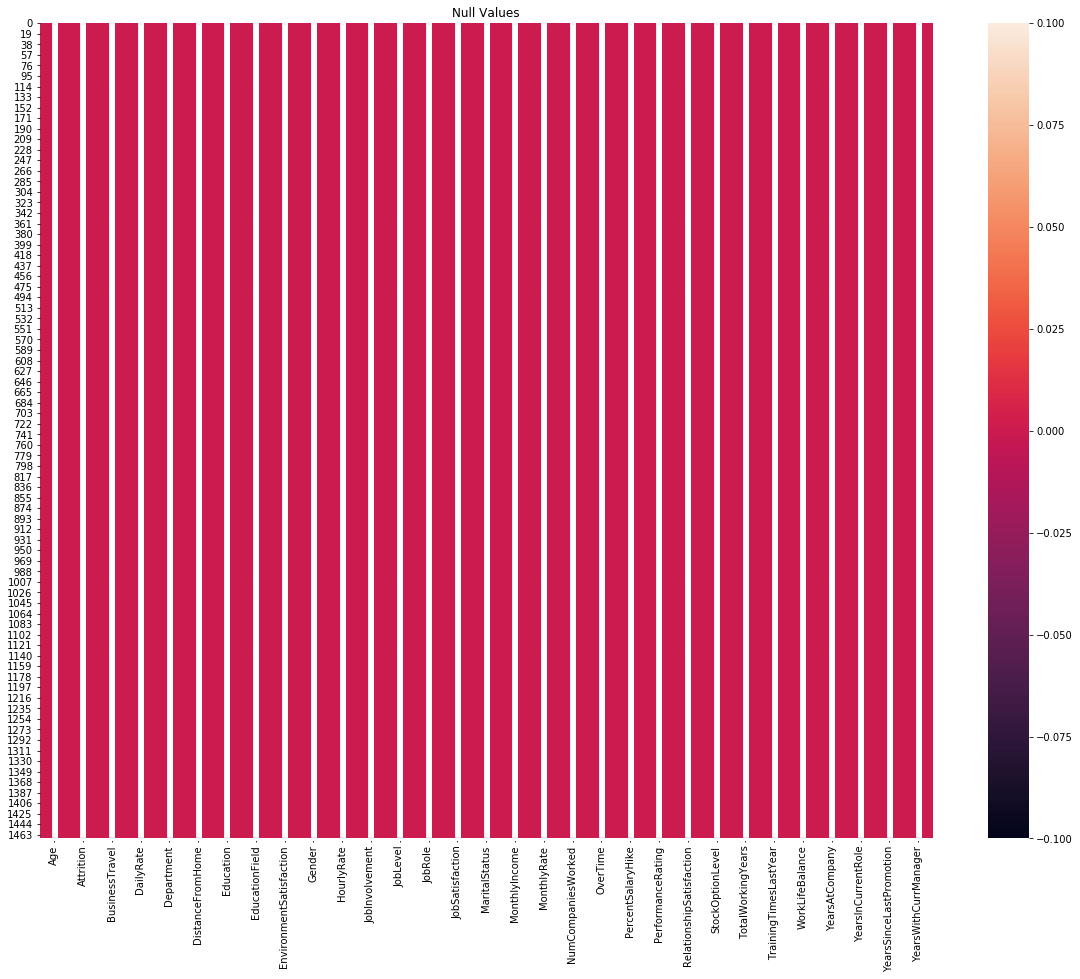

In [18]:
plt.figure(figsize = [20, 15])
sns.heatmap(df.isnull(), annot = True)                           #Visual representation of no null values present in dataset
plt.title('Null Values')
plt.show()

# EDA and Data Visualisation

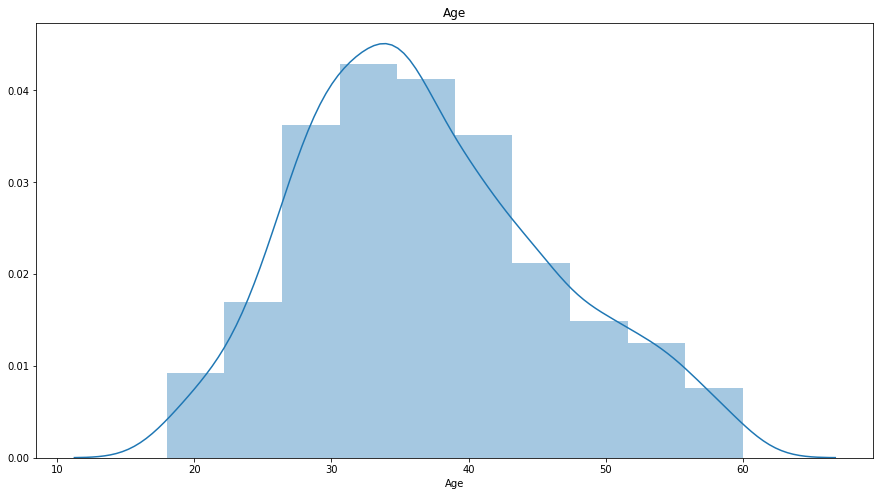

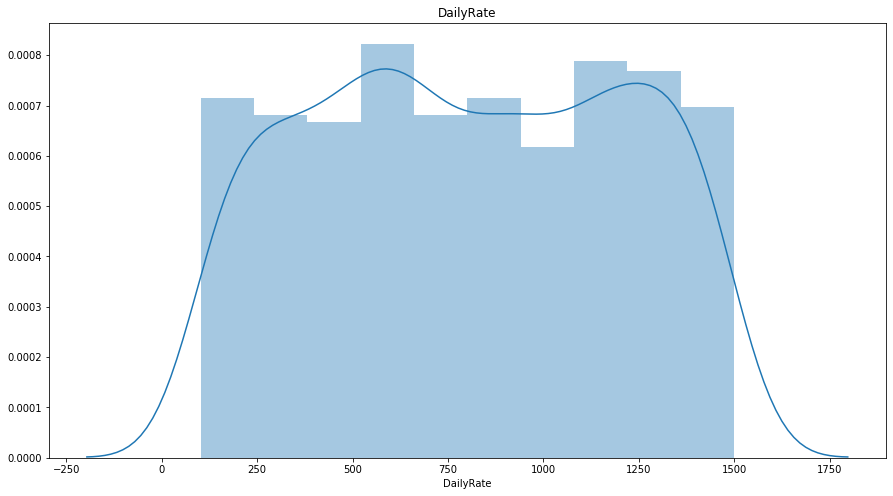

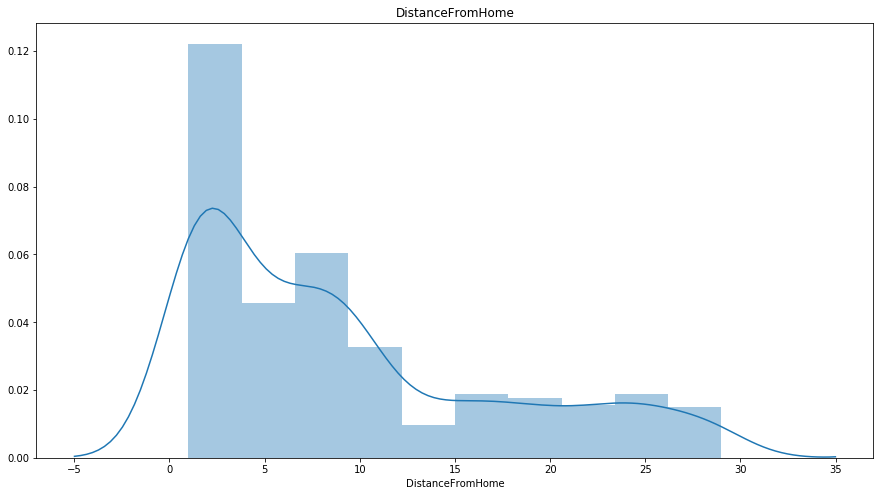

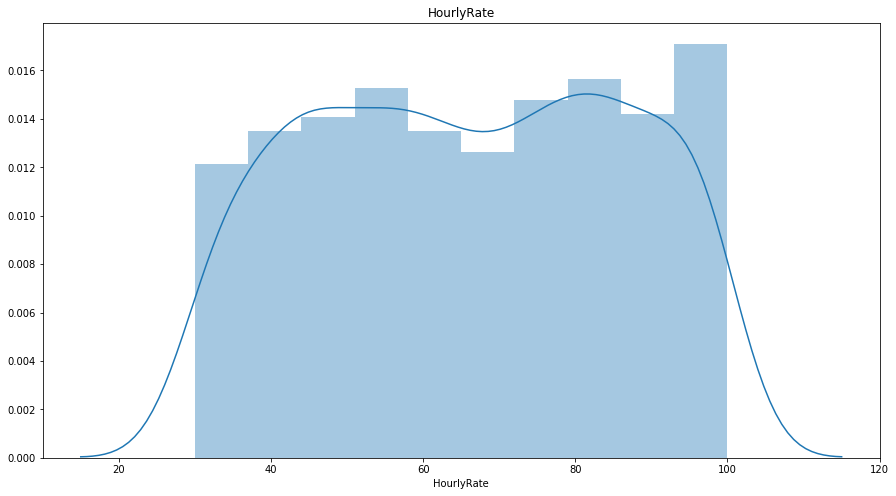

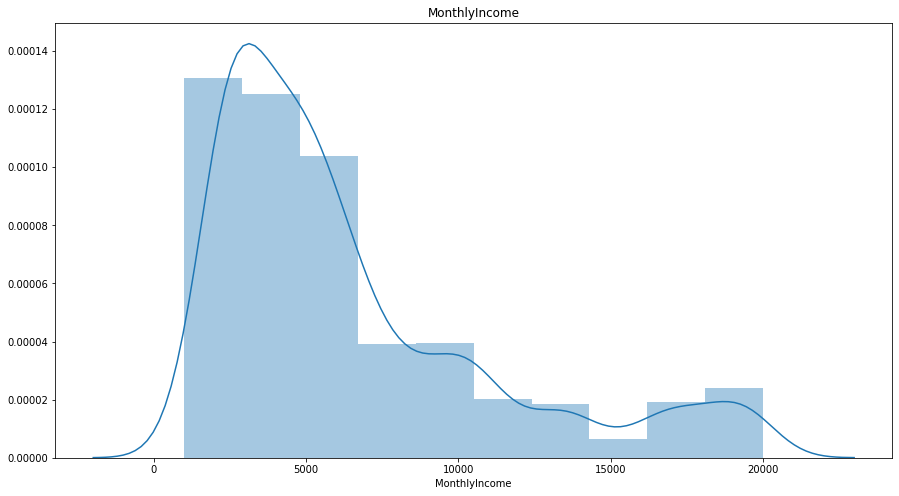

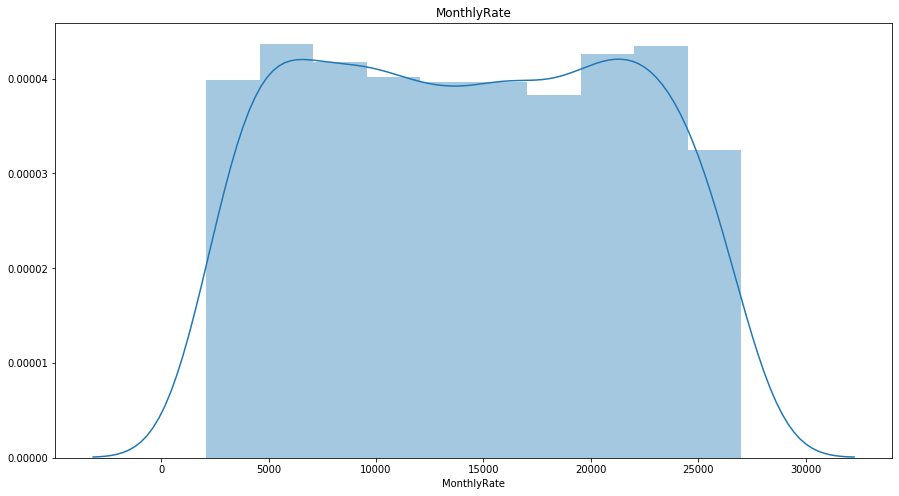

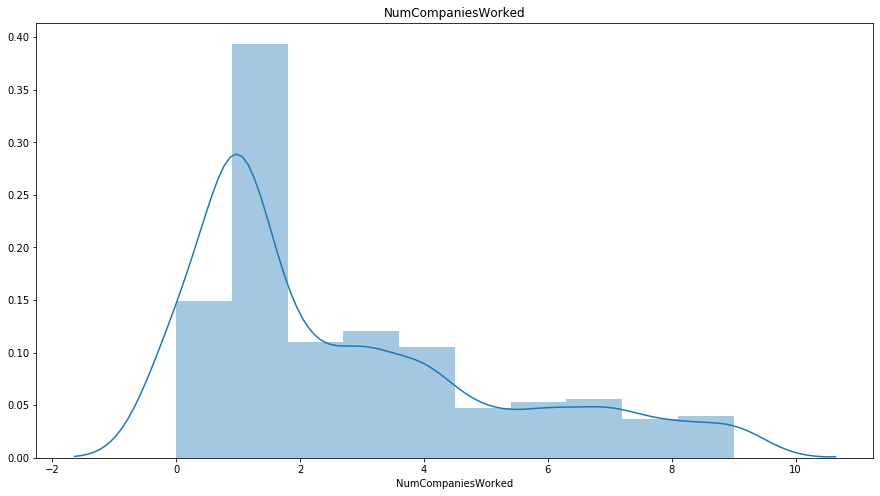

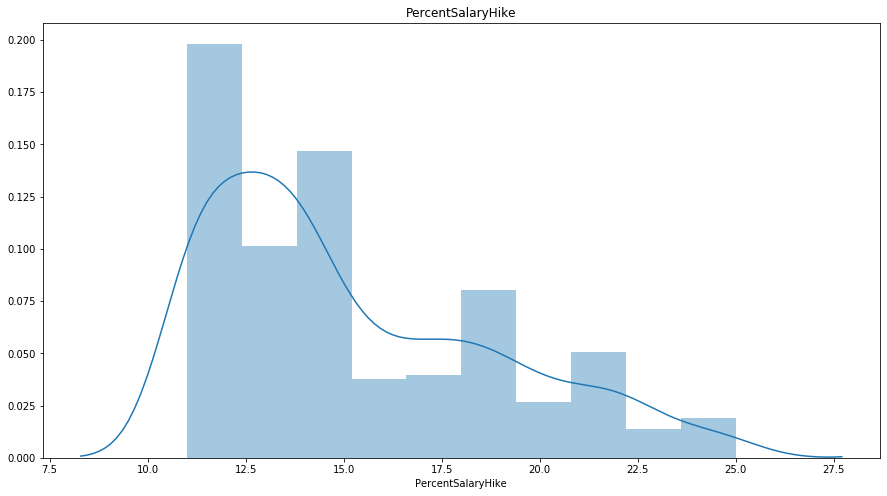

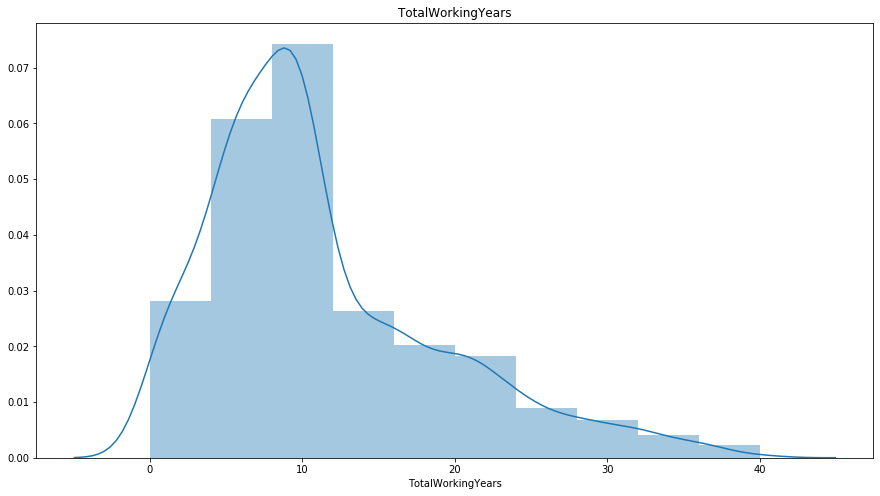

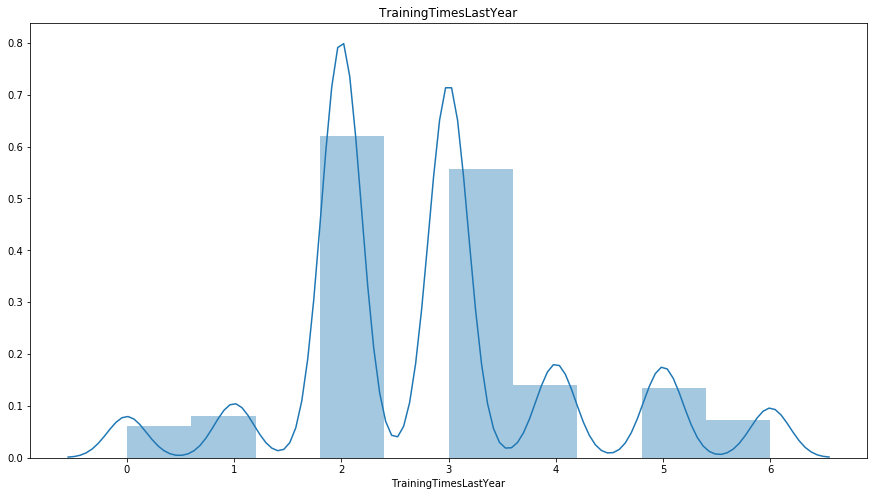

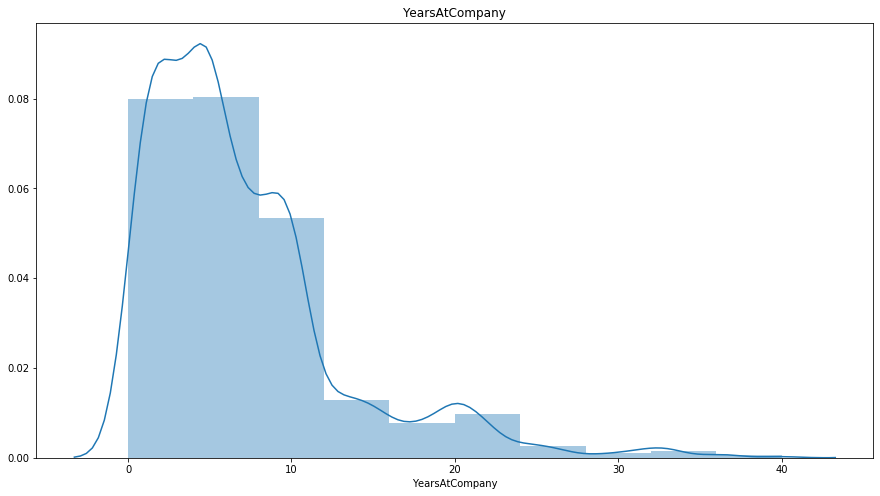

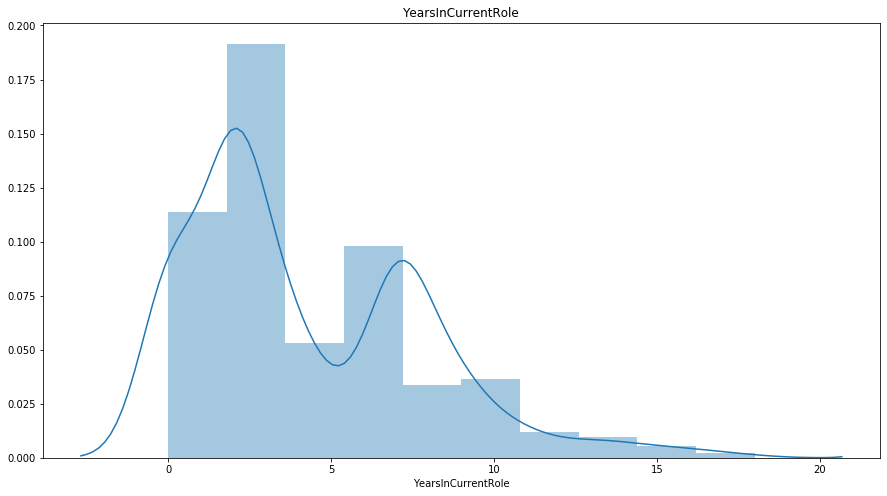

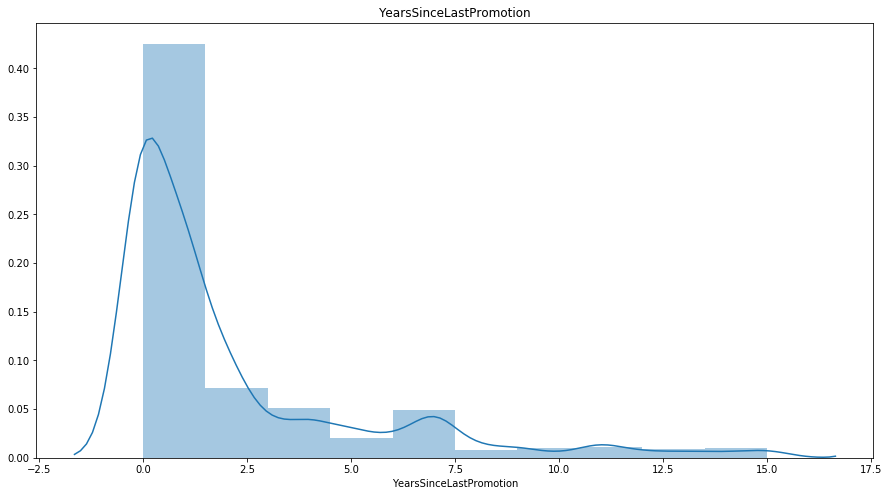

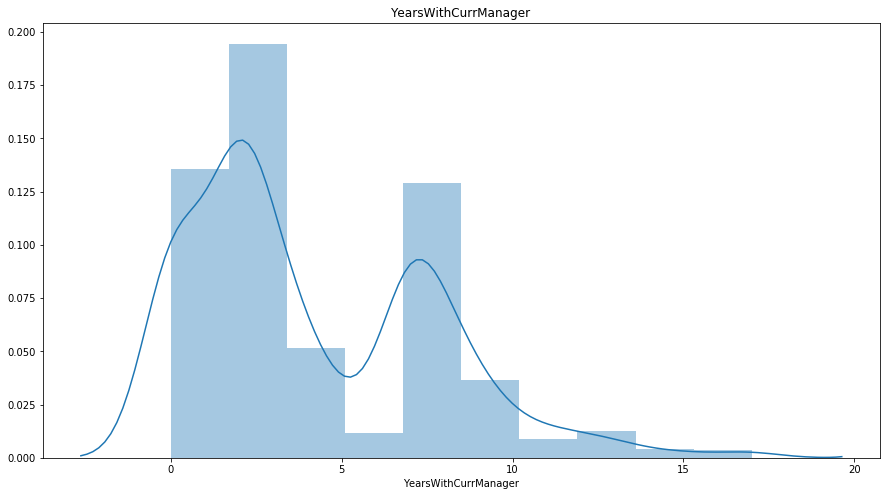

In [19]:
for i in df[cont_cols]:                                 #univariate analysis
    plt.figure(figsize = (15, 8))
    sns.distplot(df[i], bins = 10)
    plt.title(i)
    plt.show()

Only Age seems to be bell shaped graph while most of others shows right tailed skewness.

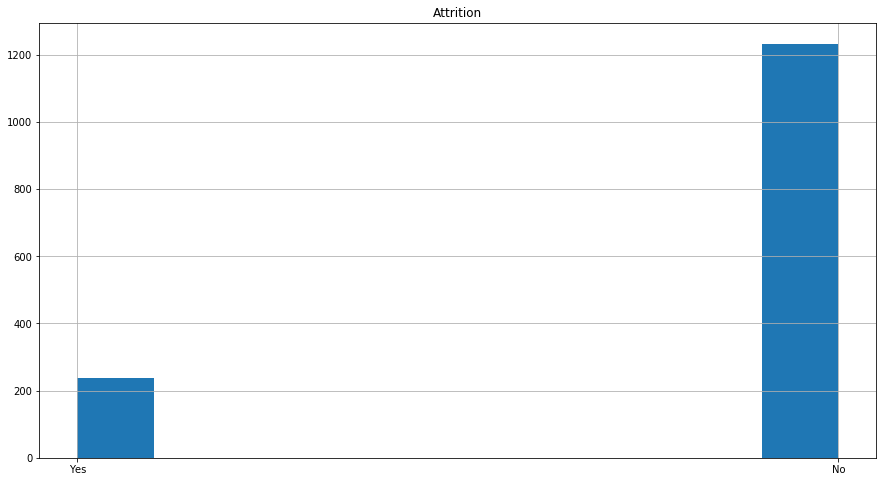

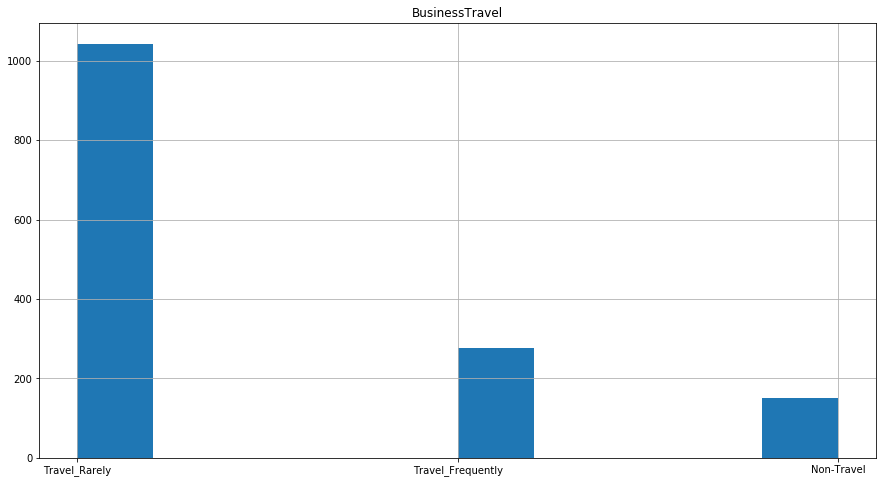

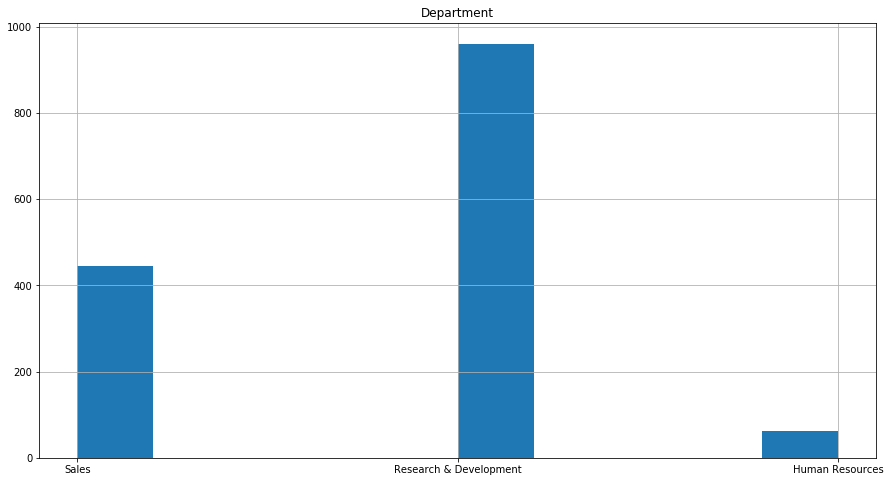

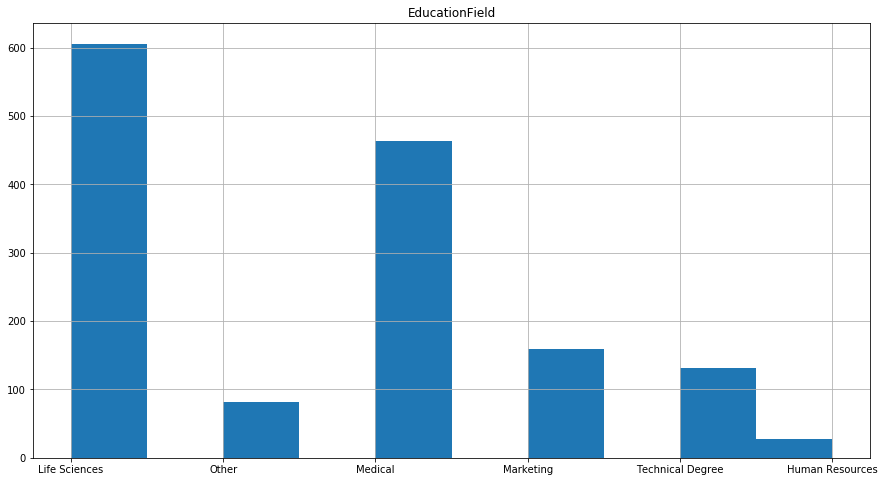

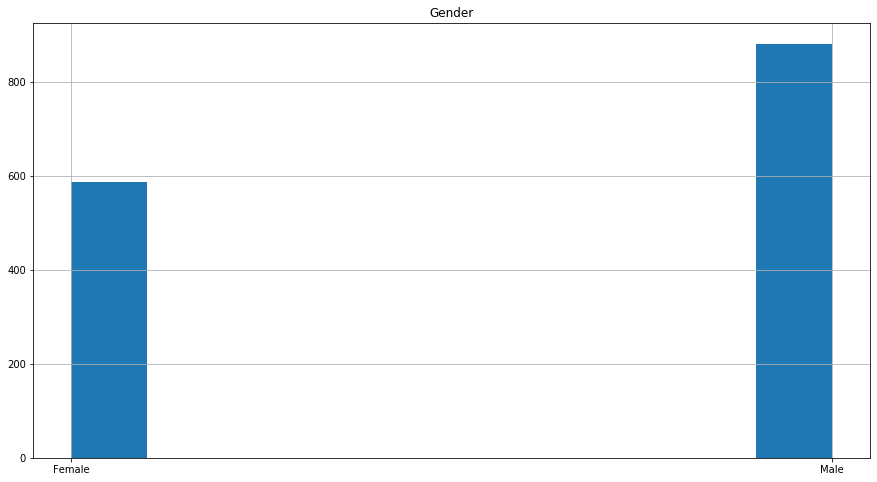

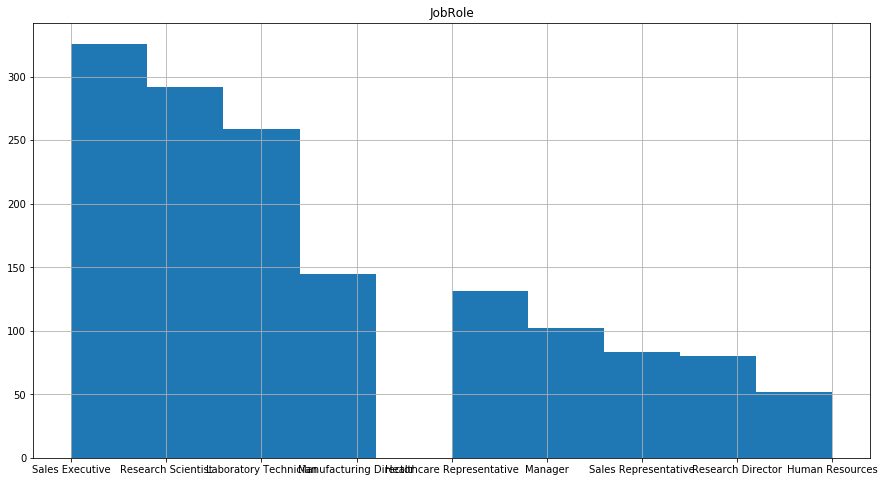

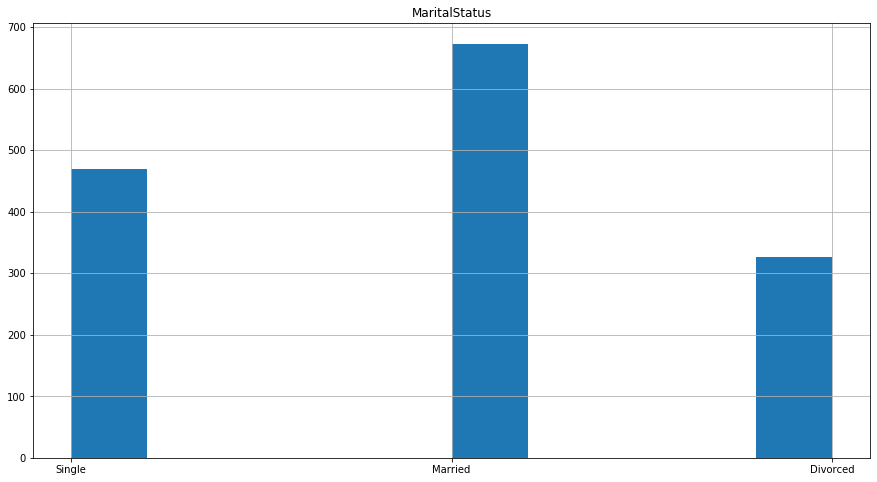

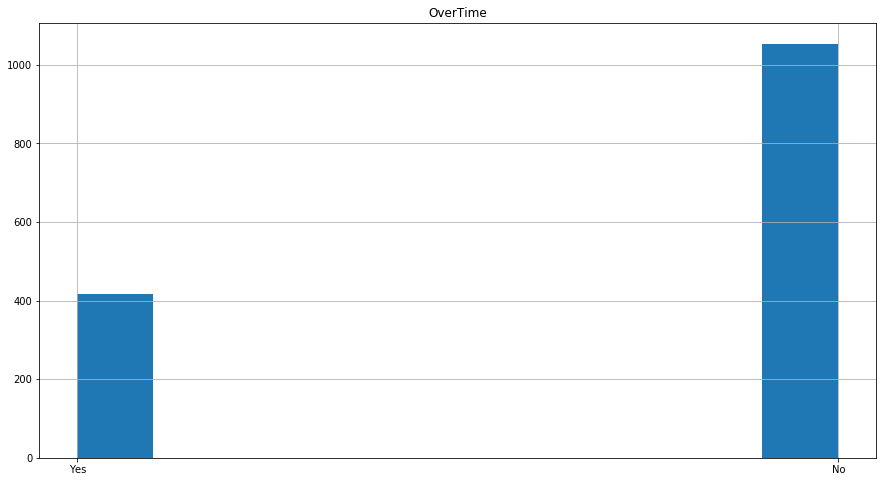

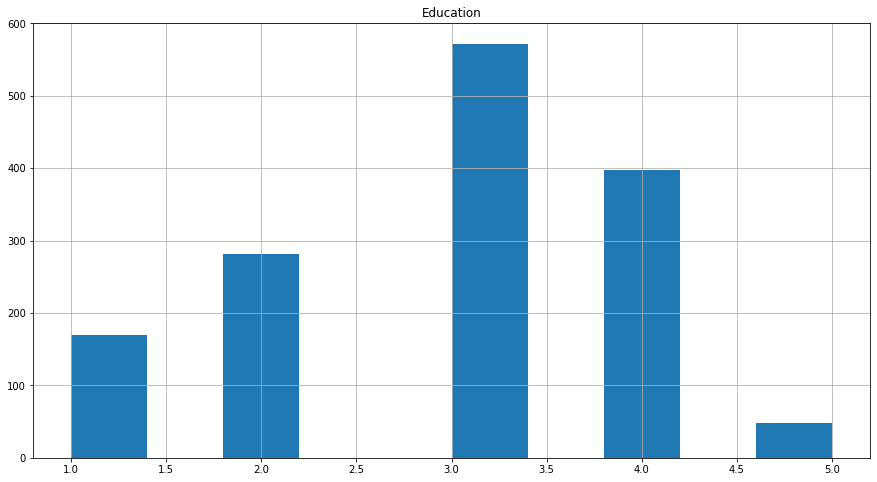

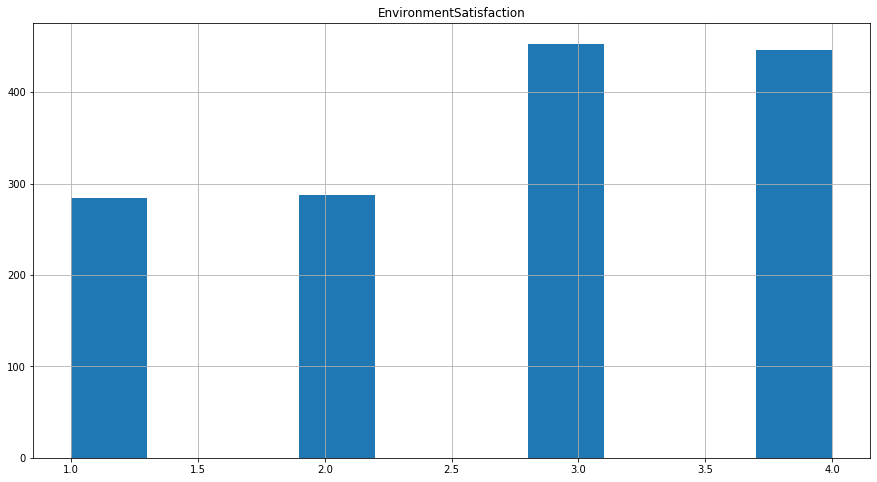

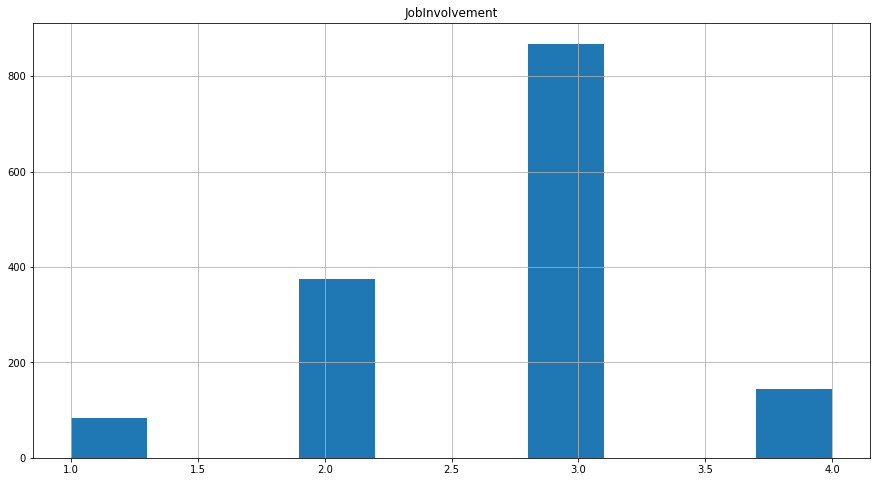

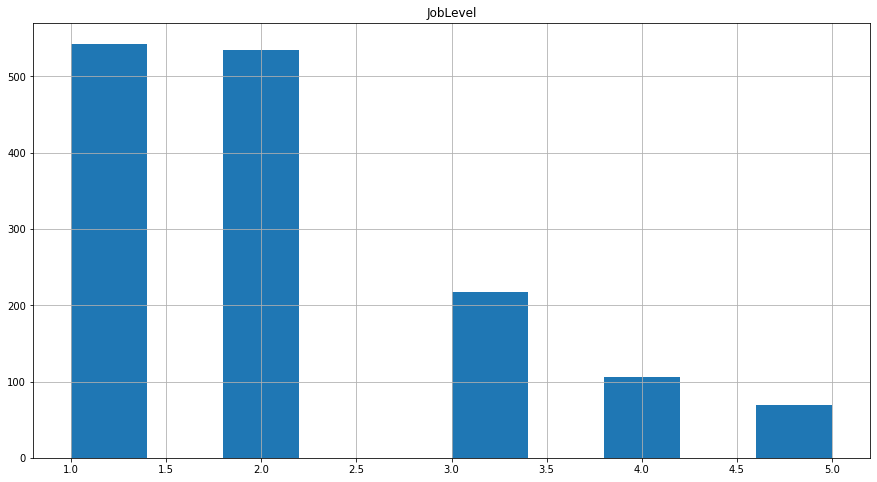

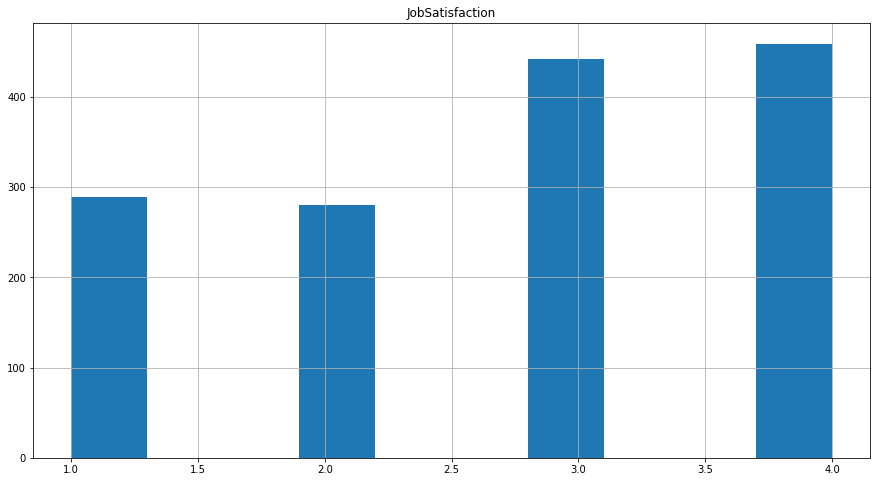

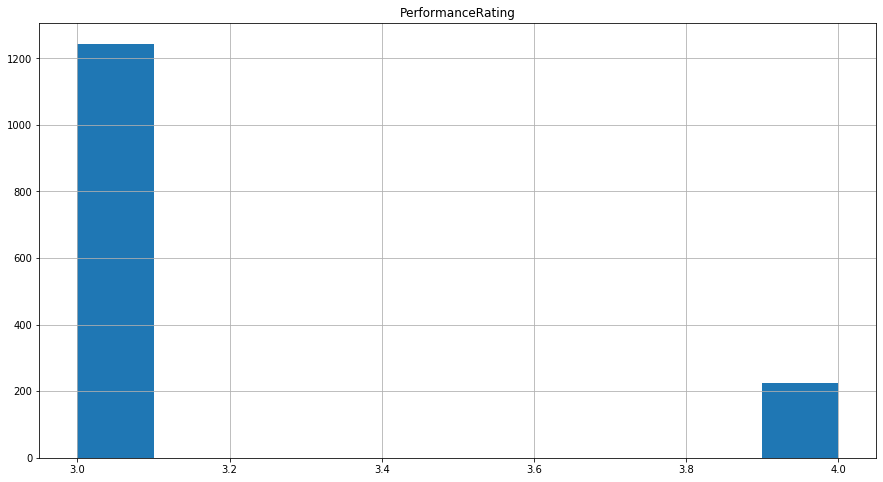

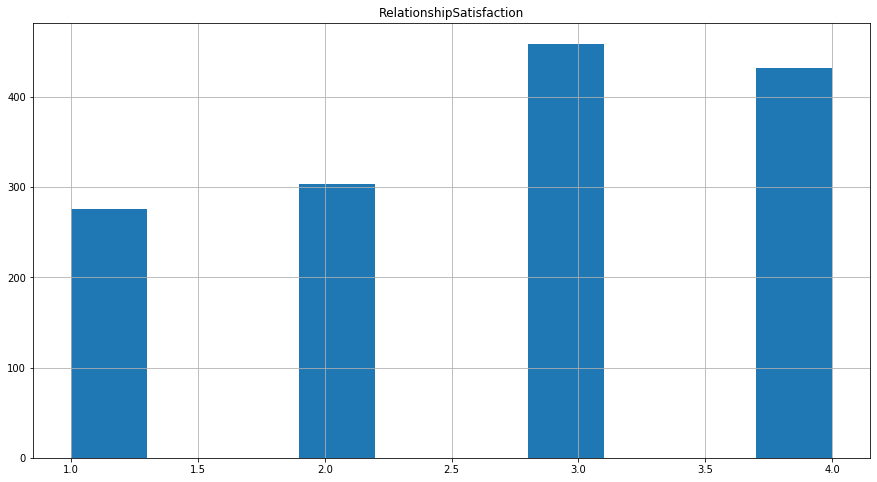

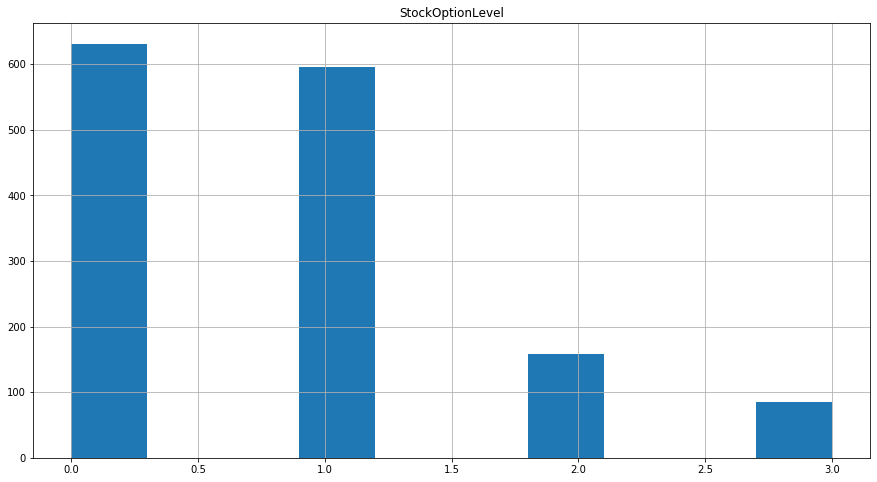

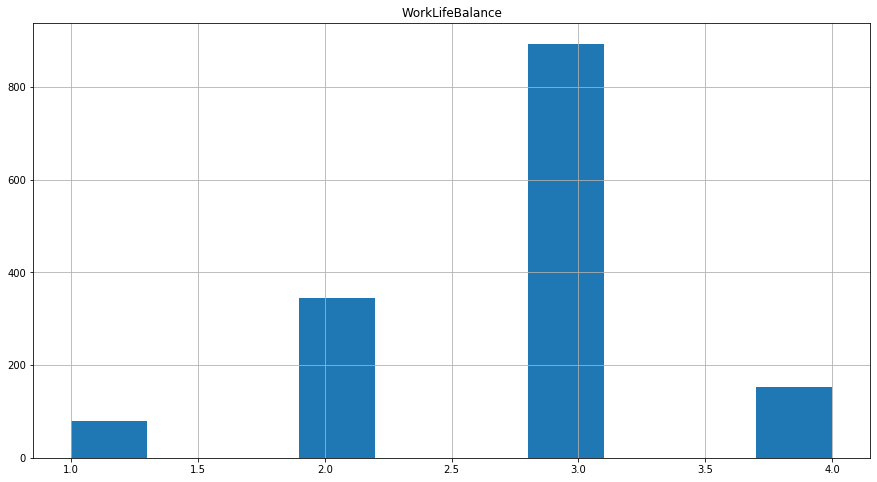

In [20]:
for i in cate_cols:                                 #univariate analysis
    plt.figure(figsize = (15, 8))
    df[i].hist(grid = True)
    plt.title(i)
    plt.show()

Most of the employees travel rarely due to business, very few frequent and non travelers.

Research & Dev seems to be the leading department, with sales at less than half of its number at around 400.

Life Sciences and then Medical are the major Education Fields and most the education is '3' followed by '4'.

Male employees dominate female employees in number by almost 200, while most of the employees are married and the work life balance is also '3' which is Better.

Most of the employees has rated '3' or higher in different fields like Environment Satisfaction, Job involvement, Job Satisfaction, Performance Rating, Relationship Satisfaction, etc.

Text(0.5, 1.0, 'Attrition  Percentage')

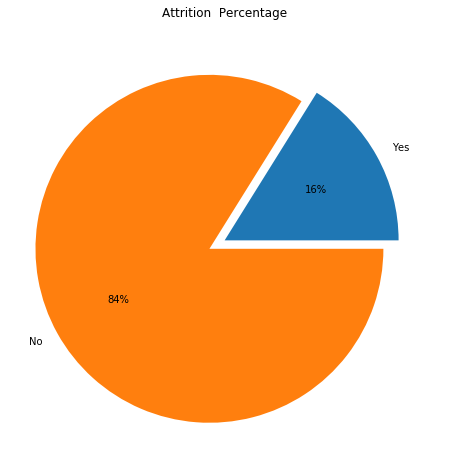

In [21]:
vals = [df.Attrition[df.Attrition=='Yes'].count() , df.Attrition[df.Attrition=='No'].count()]
plt.figure(figsize = (15, 8))
label = ["Yes" , "No"]
plt.pie(vals , labels=label , autopct = '%1.0f%%' , explode=(0 , 0.1))
plt.title("Attrition  Percentage")

As we can see from this pie chart that 84% of the data No attrition and remaining 16% Yes Attrition.

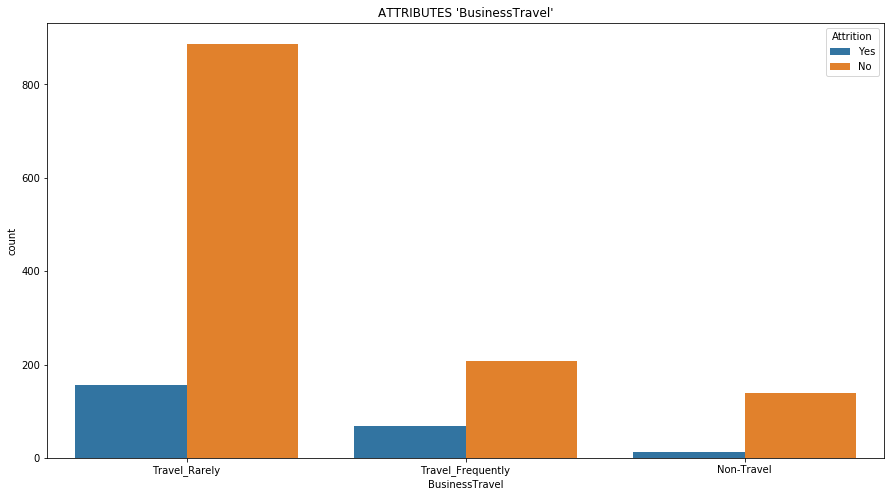

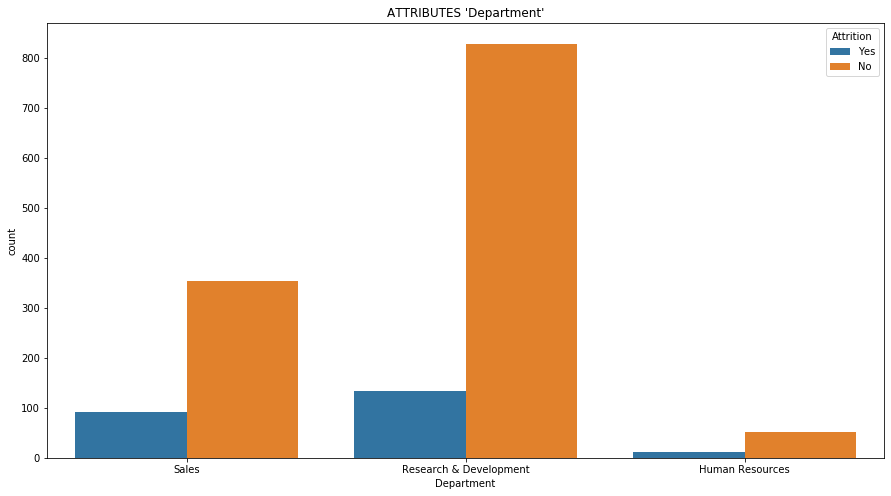

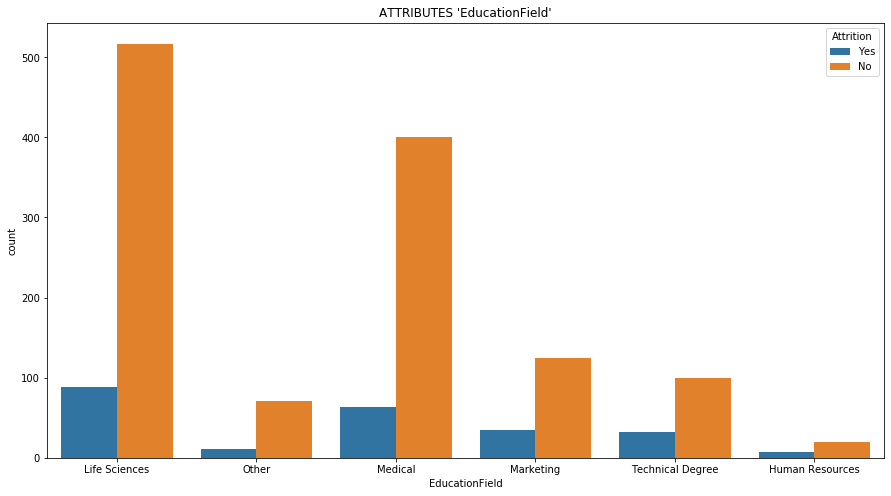

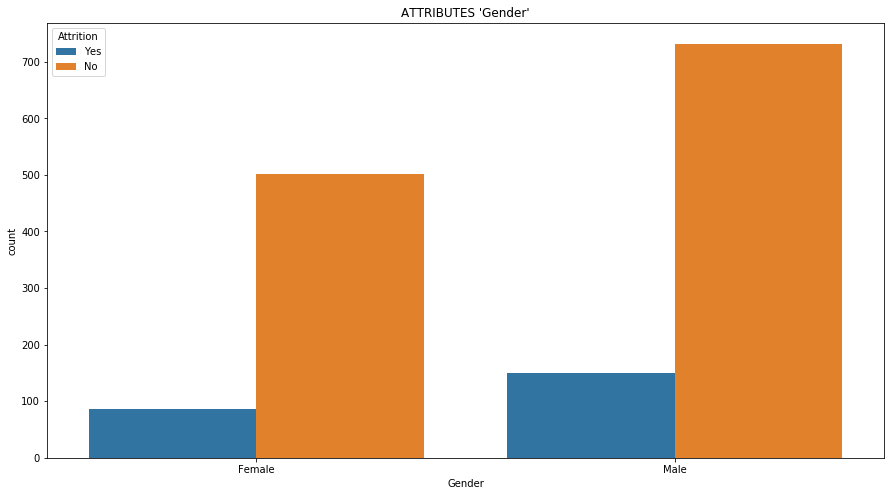

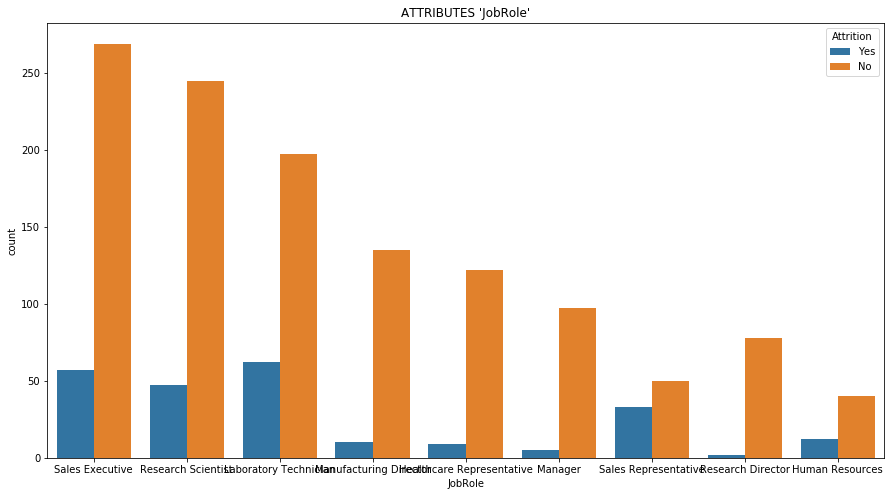

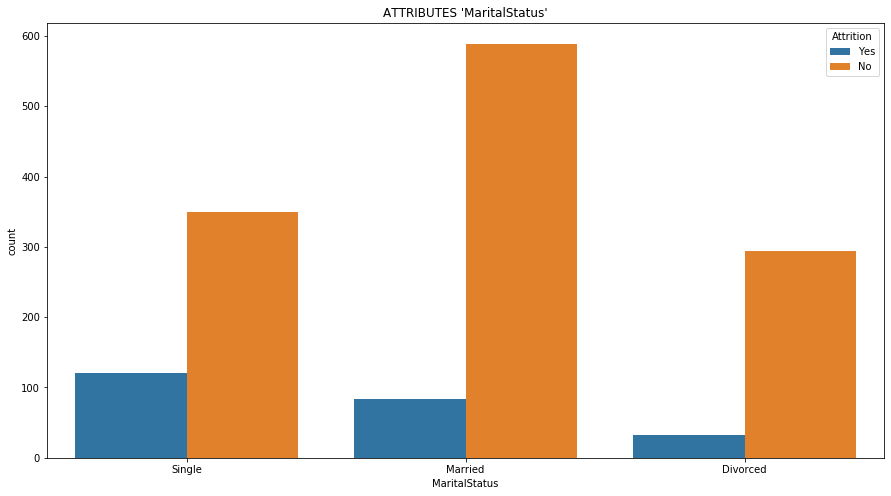

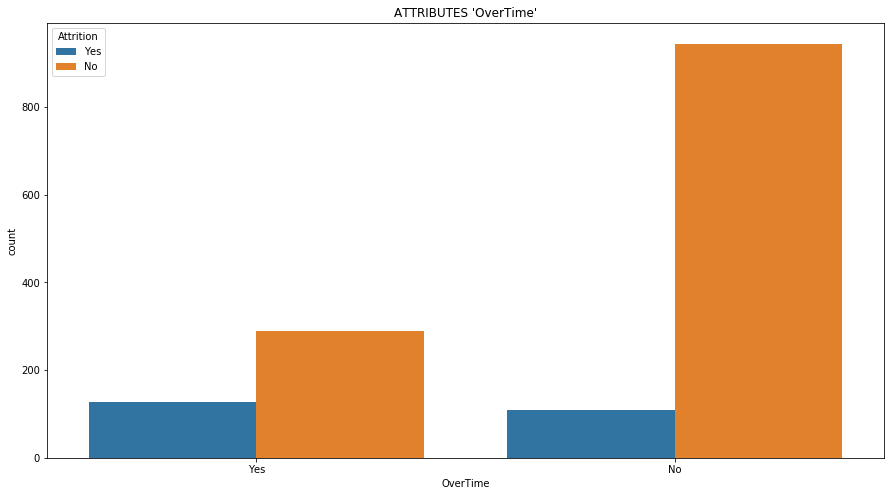

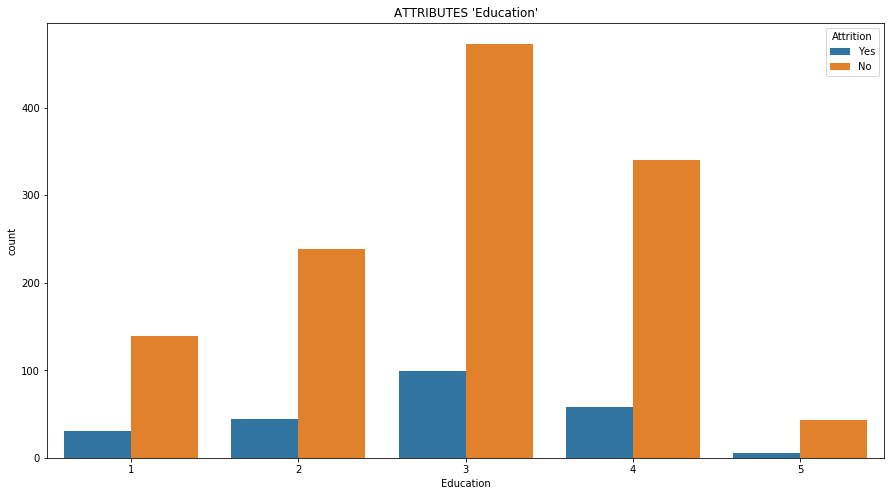

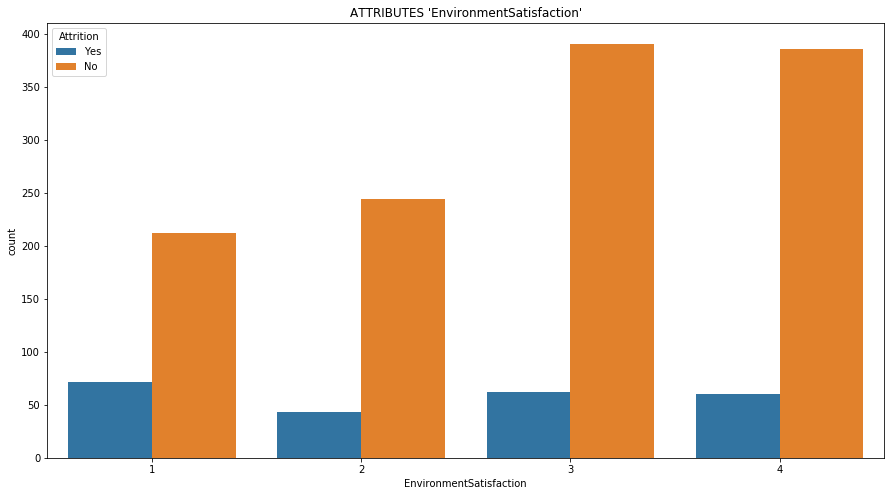

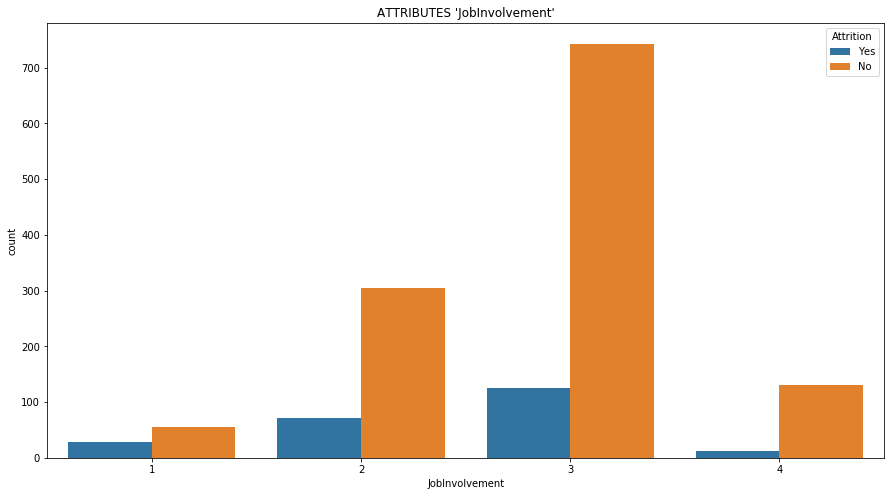

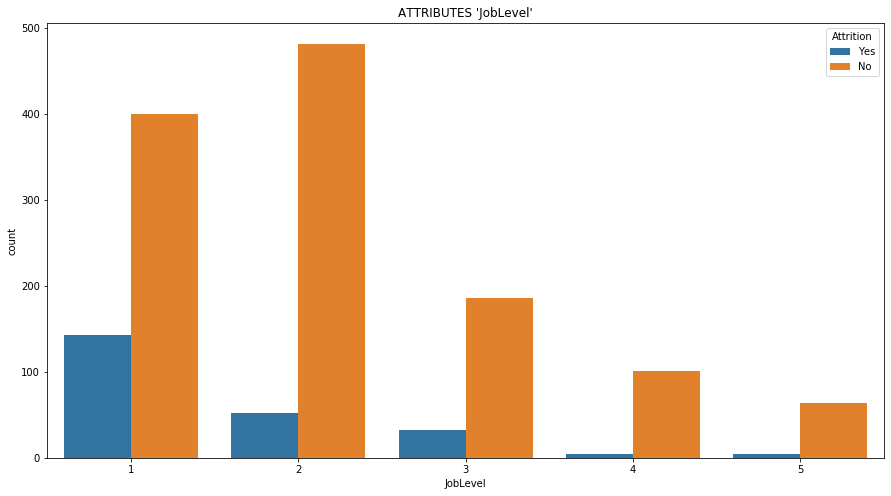

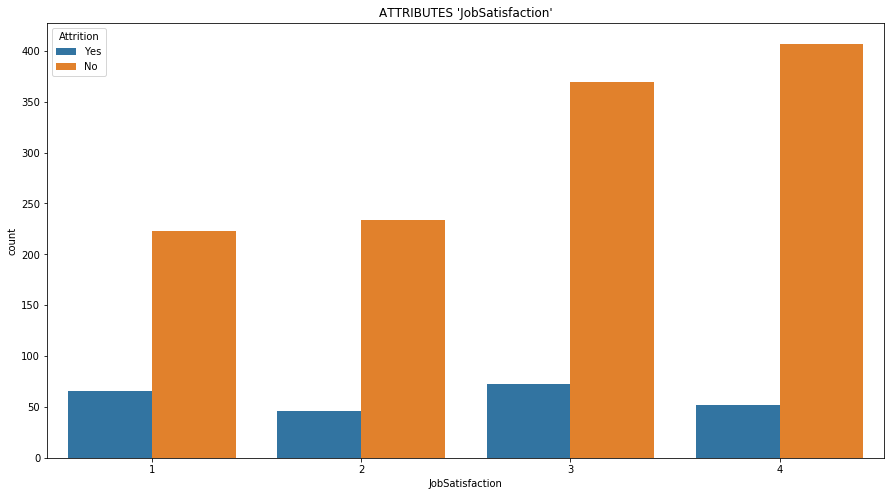

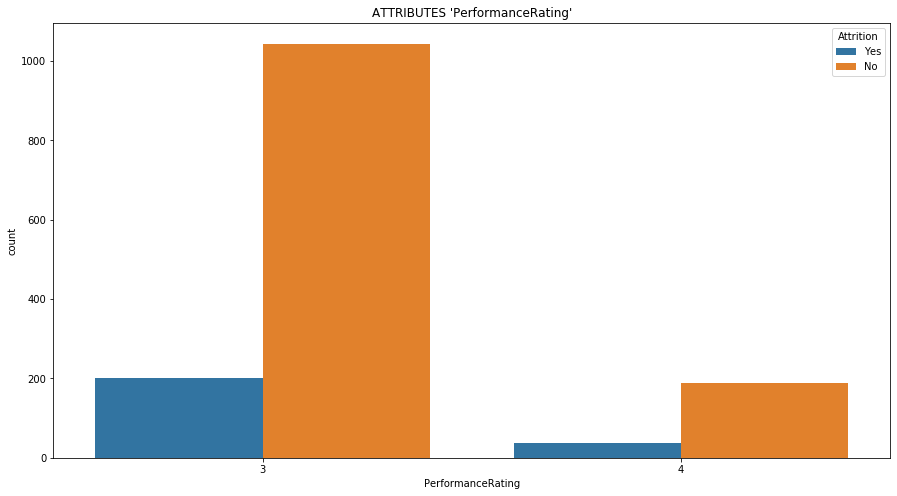

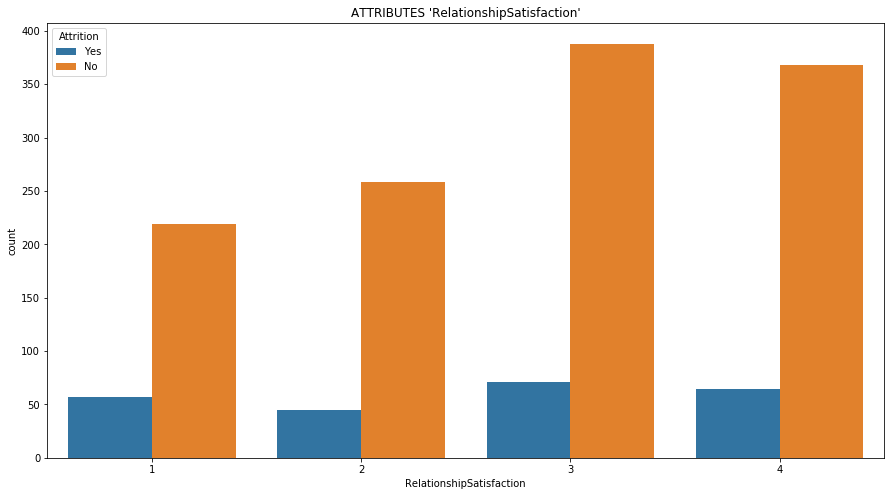

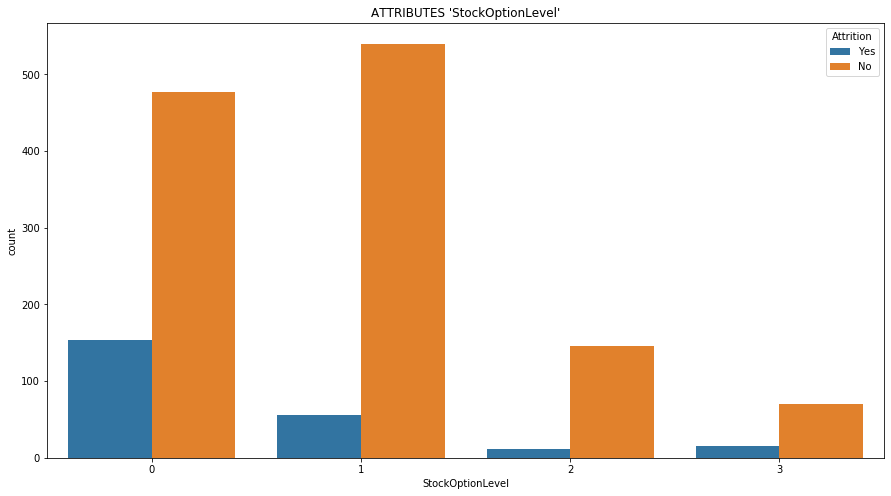

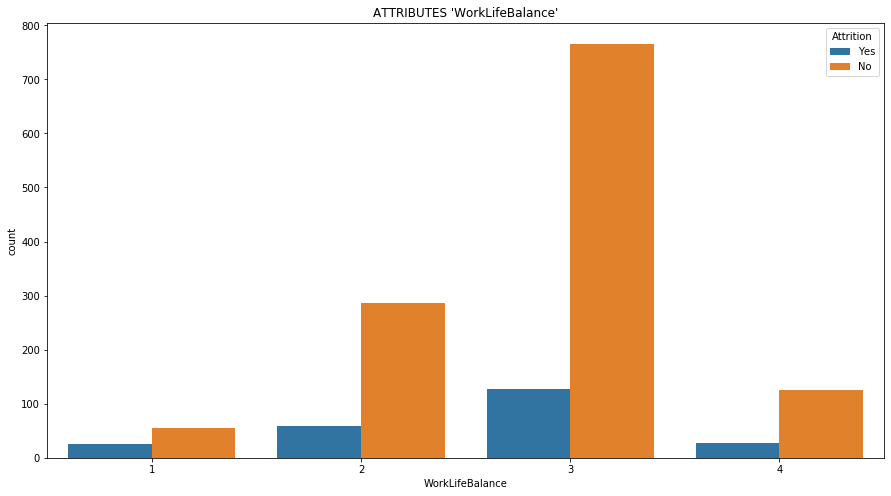

In [22]:
for i in cate_cols[1:]:                                #bivariate analysis
    plt.figure(figsize=(15, 8))
    plt.title("ATTRIBUTES '%s'"%i)
    sns.countplot(df[i],hue=df['Attrition'])

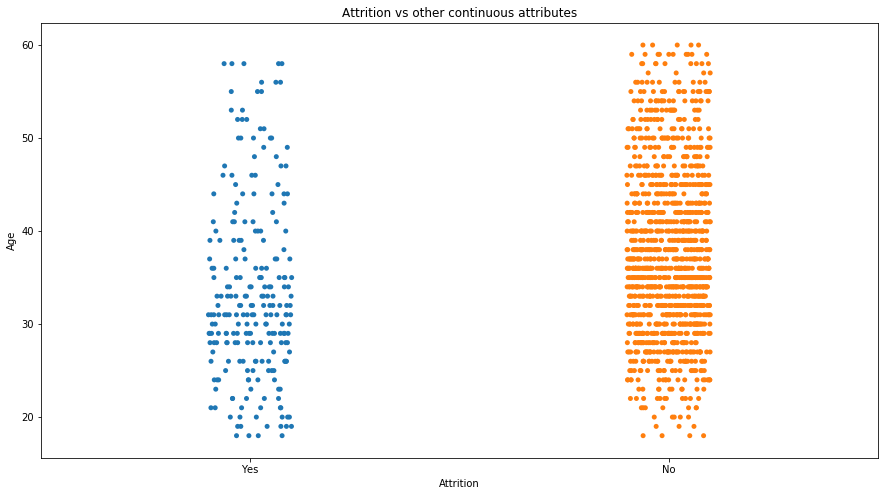

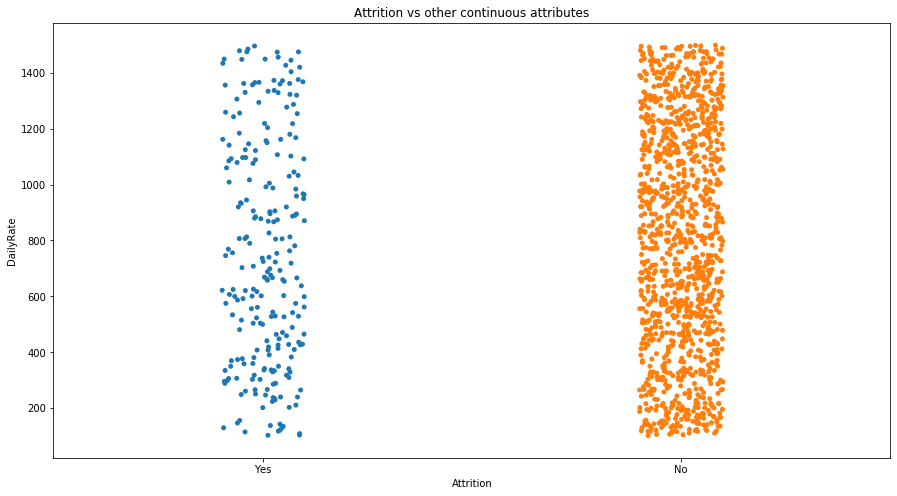

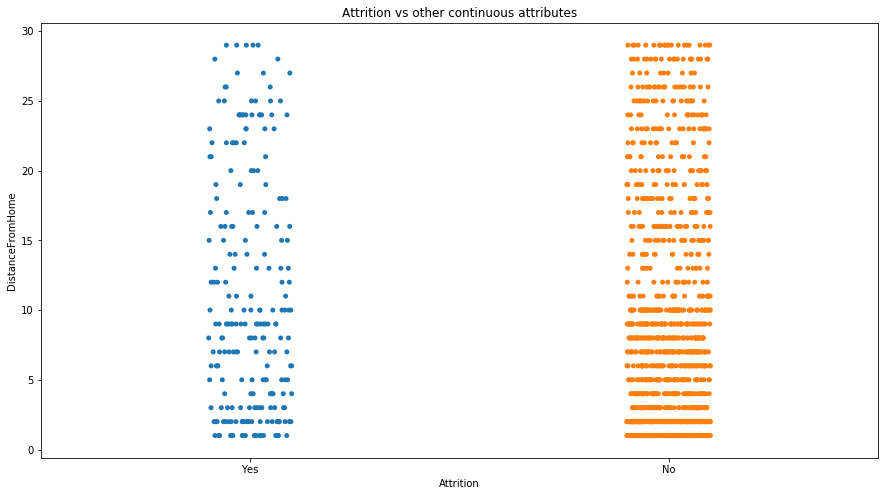

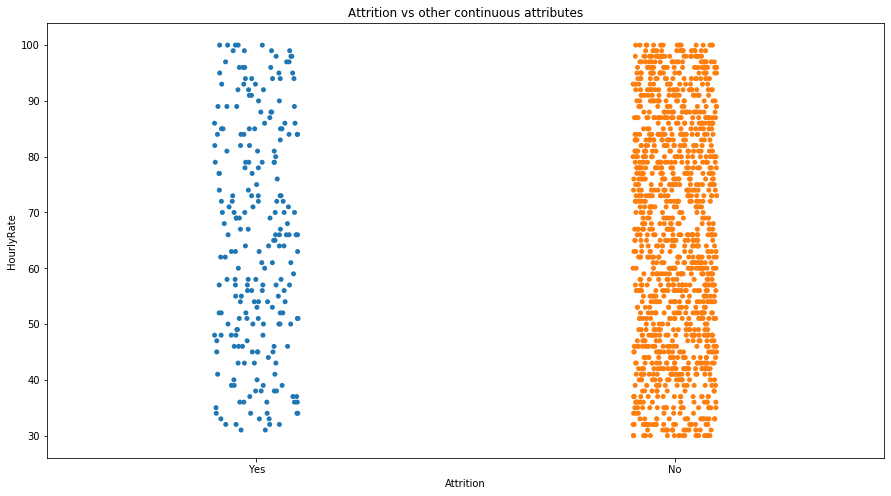

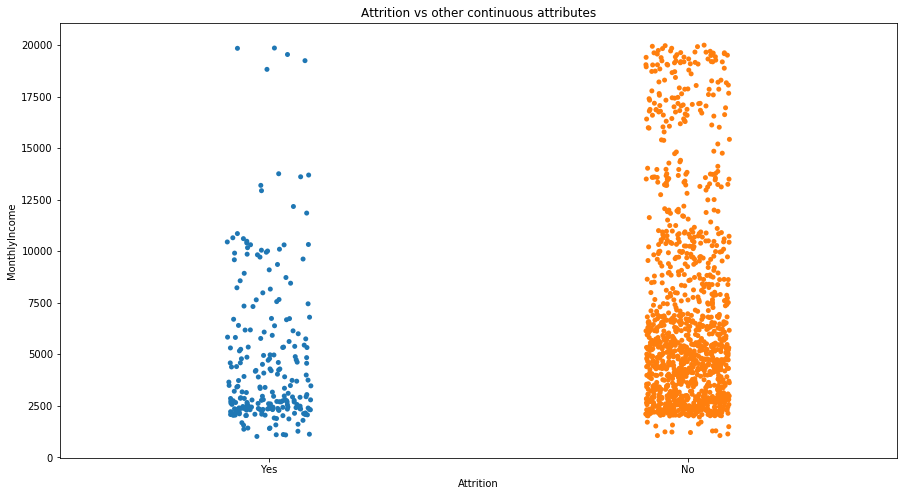

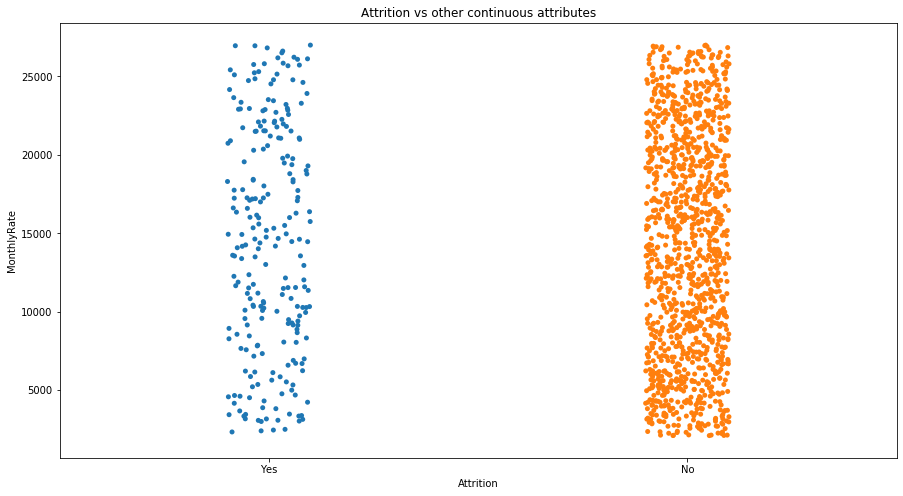

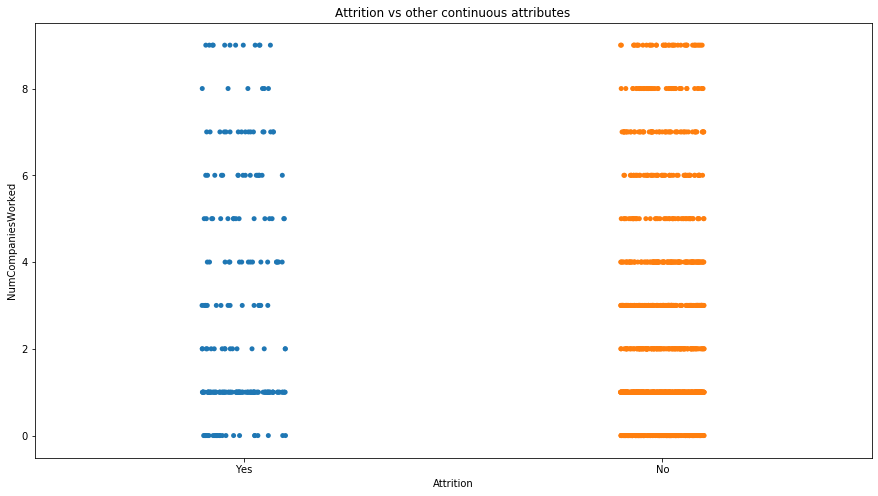

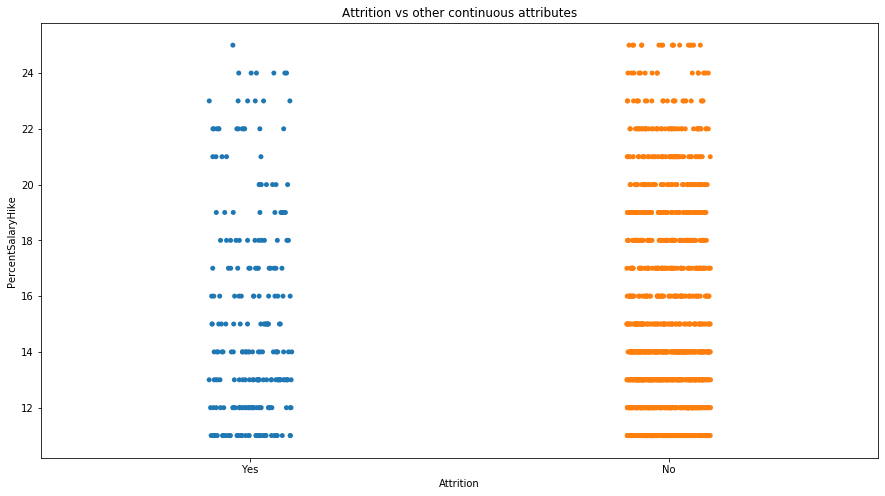

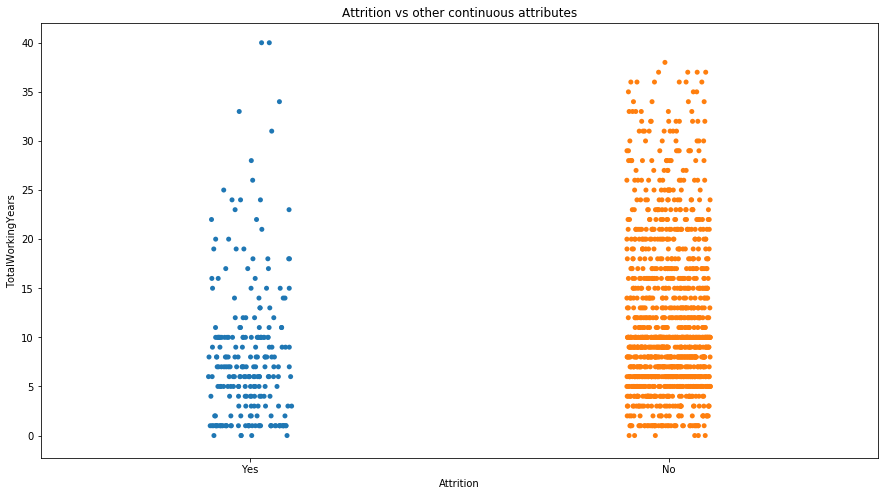

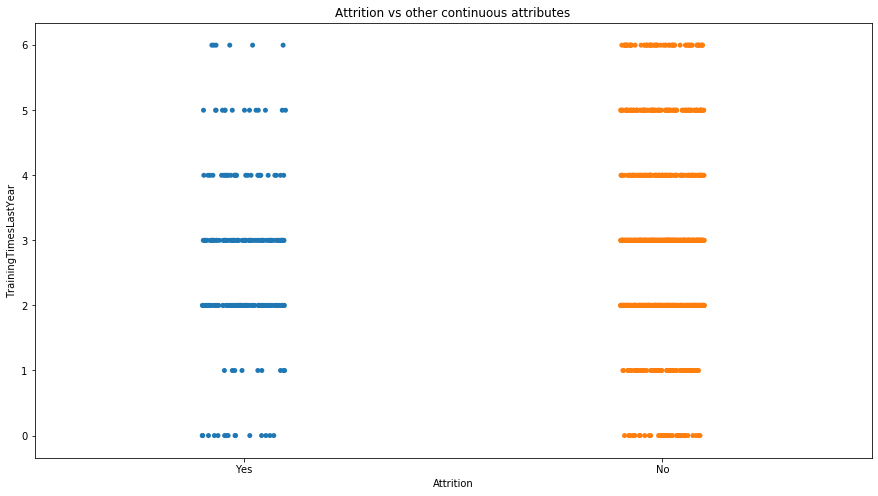

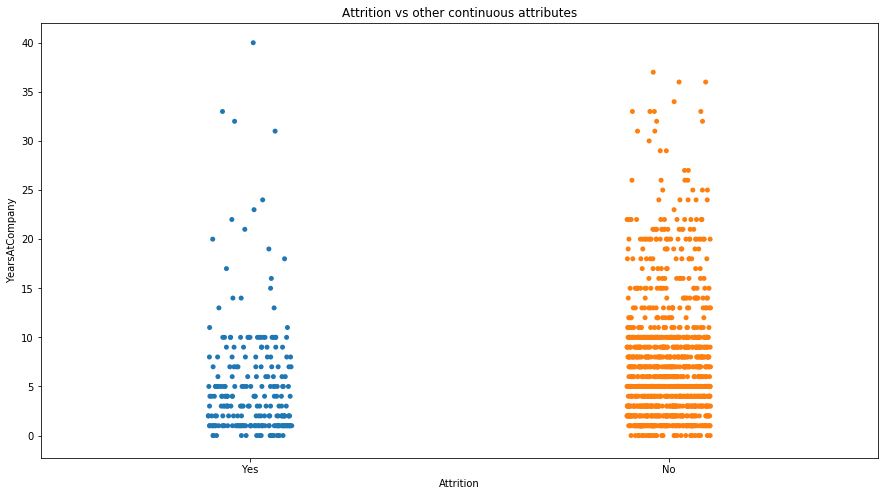

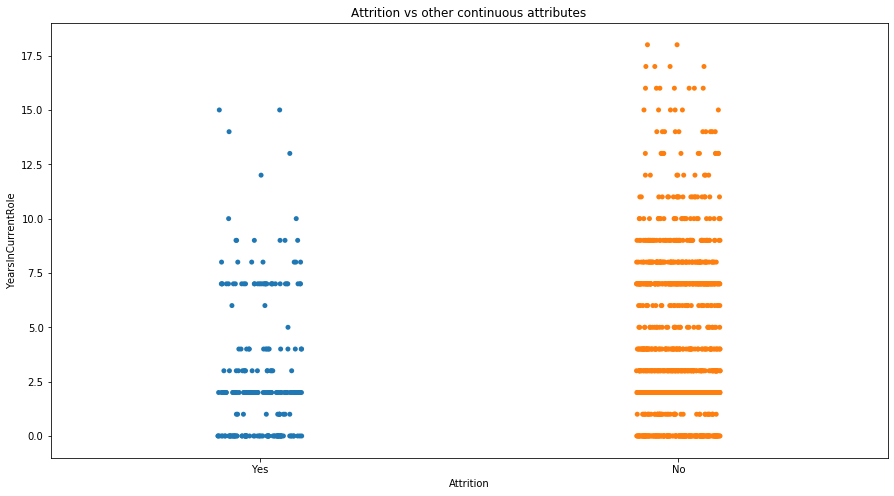

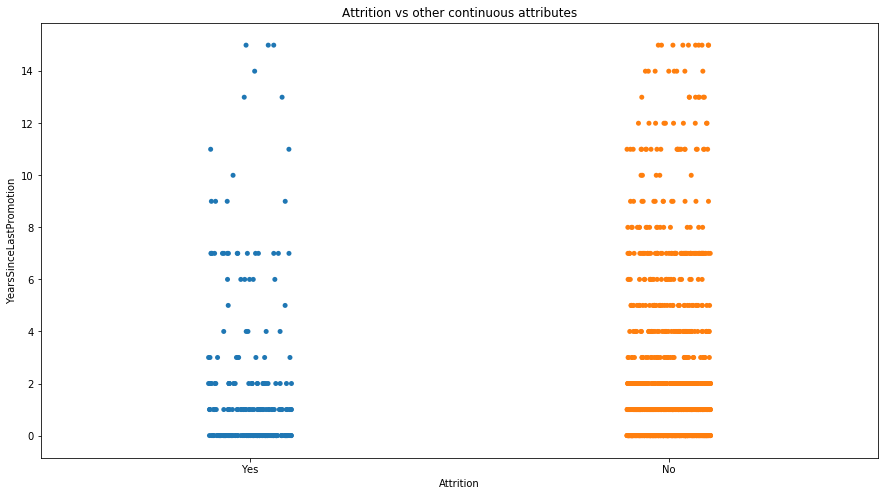

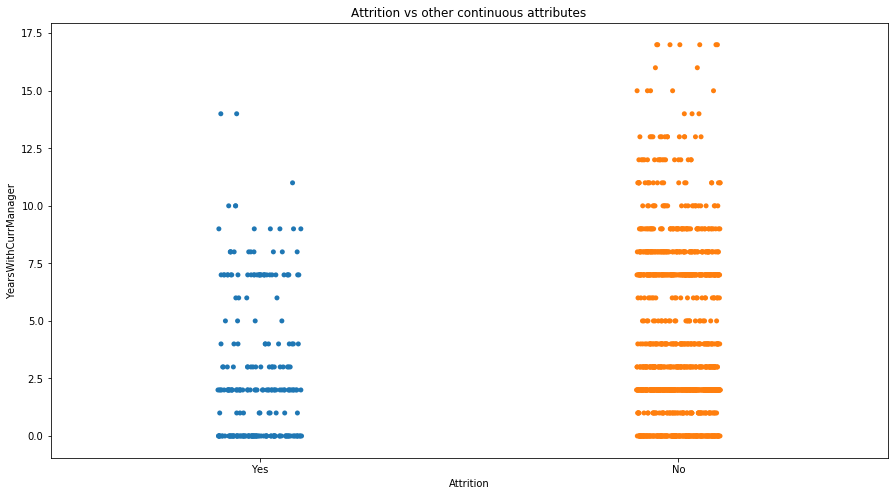

In [23]:
for i in cont_cols:                                          #bivariate analysis
    plt.figure(figsize = (15, 8))
    ax = sns.stripplot(df['Attrition'], df[i])
    ax.set(xlabel = 'Attrition', ylabel = i)
    plt.title('Attrition vs other continuous attributes')
    plt.show()

Most of the attrition takes place in employees with lower monthly incomes, low number of companies worked for, low salary hike percent, low experience, less years with company and in current role.

In [24]:
df['Attrition'].replace('No', 0, inplace = True)
df['Attrition'].replace('Yes', 1, inplace = True)

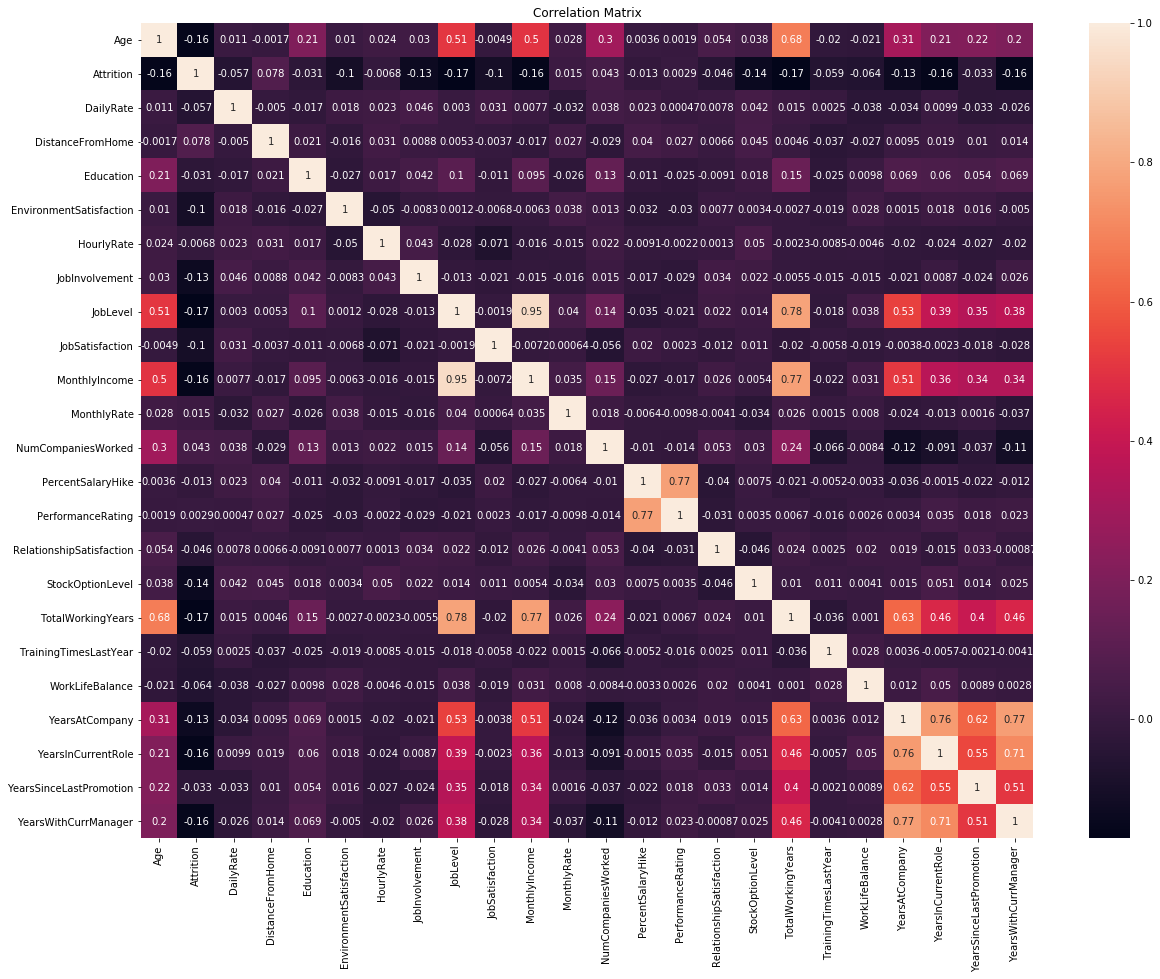

In [25]:
plt.figure(figsize = [20, 15])                             #multivariate analysis
sns.heatmap(df.corr(), annot = True)
plt.title('Correlation Matrix')
plt.show()

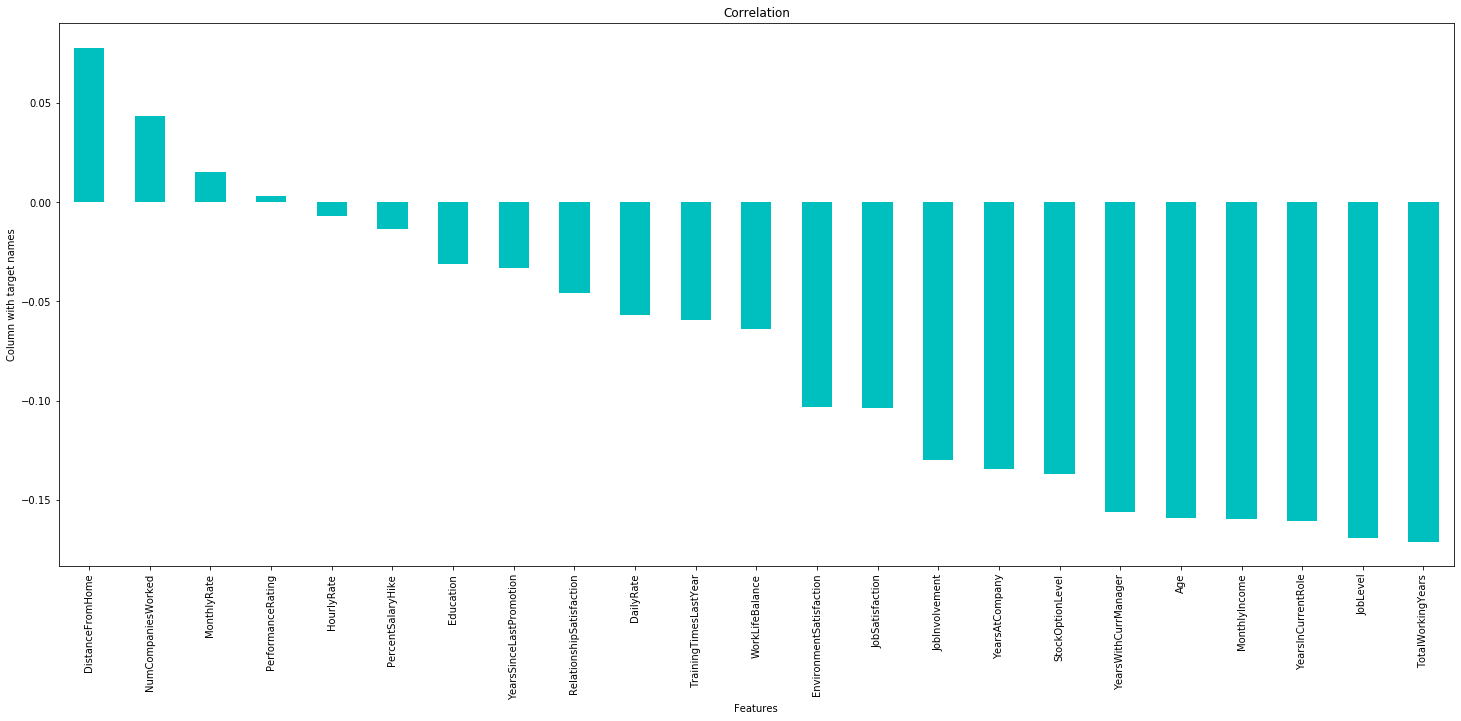

In [26]:
plt.figure(figsize = (25, 10))
df.corr()['Attrition'].sort_values(ascending = False).drop(['Attrition']).plot(kind = 'bar', color = 'c')
plt.xlabel('Features')
plt.ylabel('Column with target names')
plt.title('Correlation')
plt.show()

Most of the features are negatively correlated with attrition, this is due to 84% of attrition value being No. Total working years seems to have highest negative correlation with attrition at -0.17, while there are others like job level, years in current role, monthly income, age, years with current manager, etc which also seems to have very high negative correlation with attrition.

# Outliers and Skewness

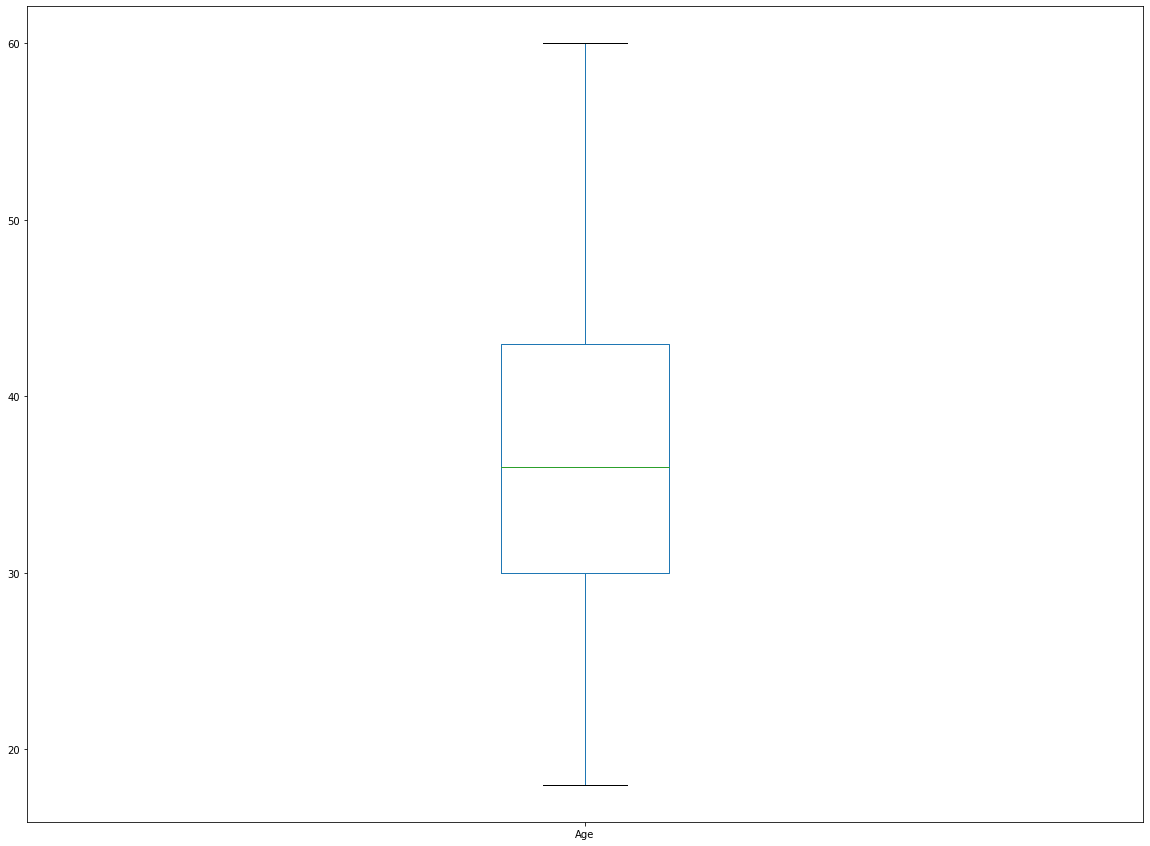

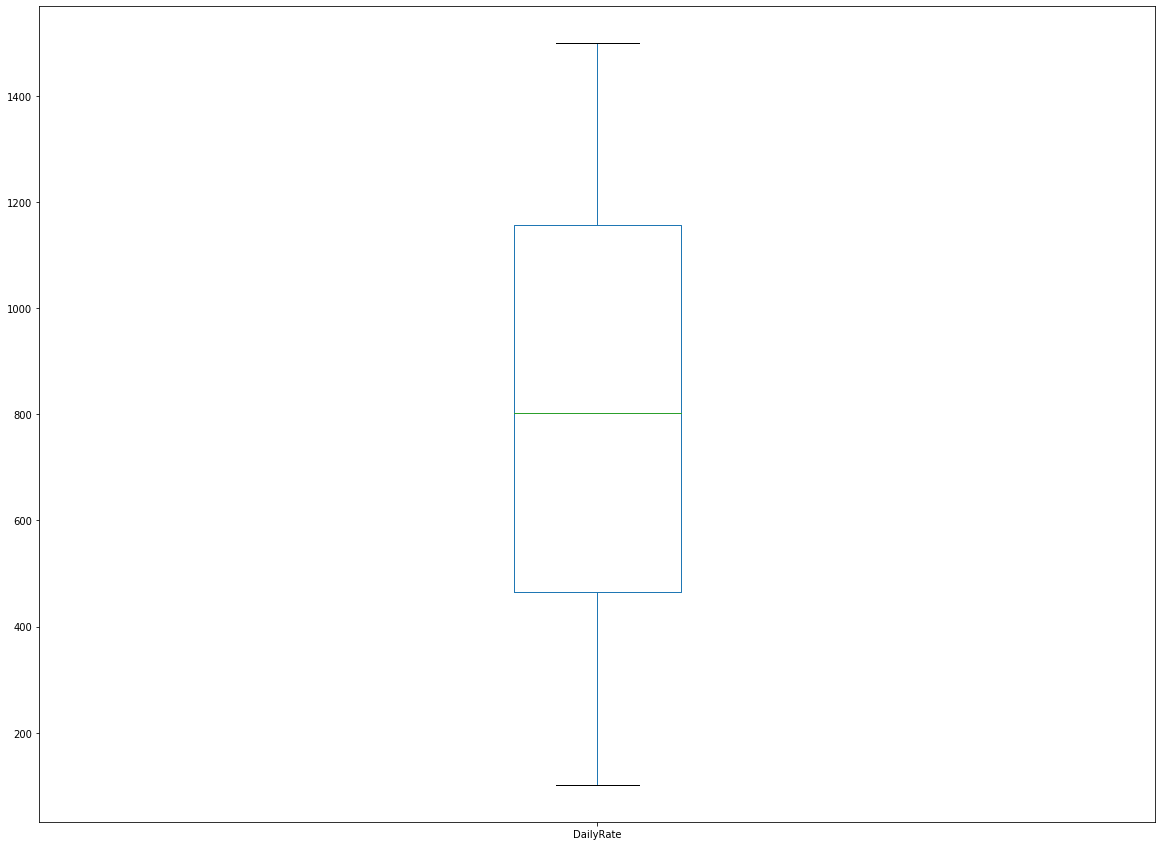

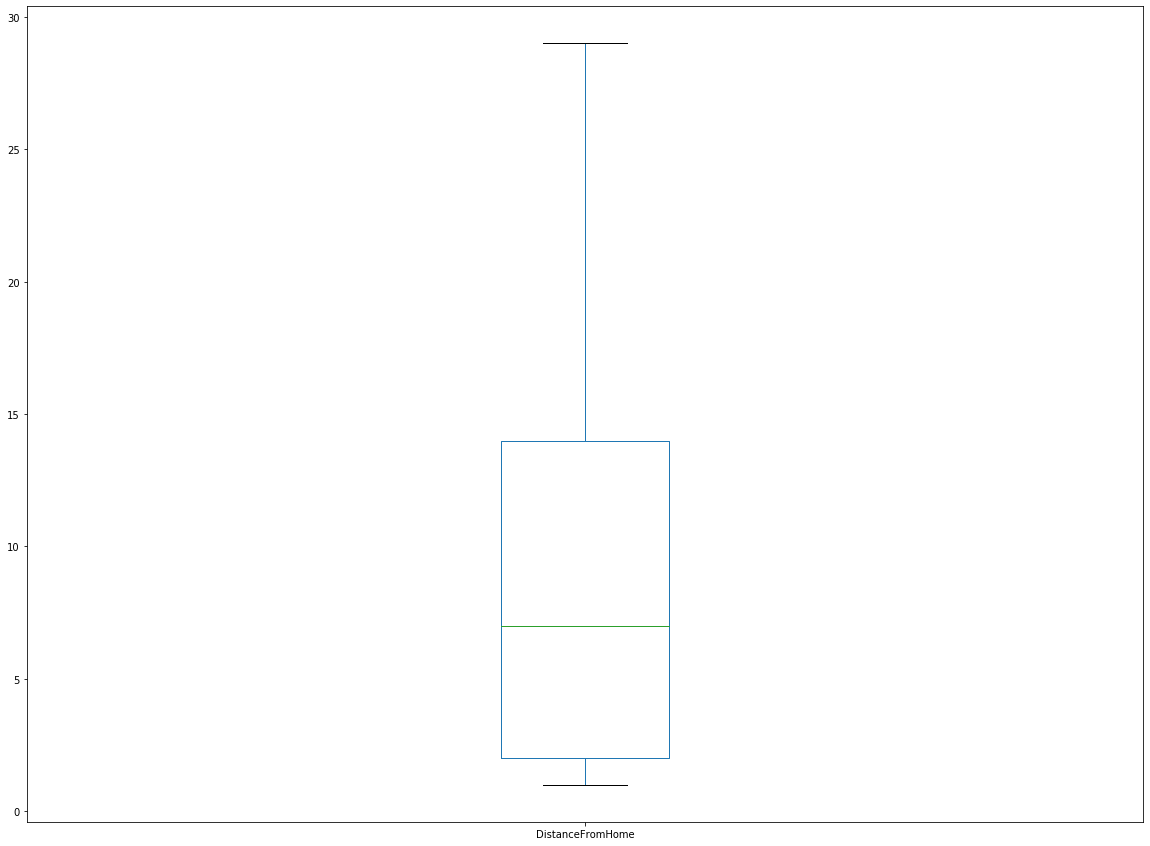

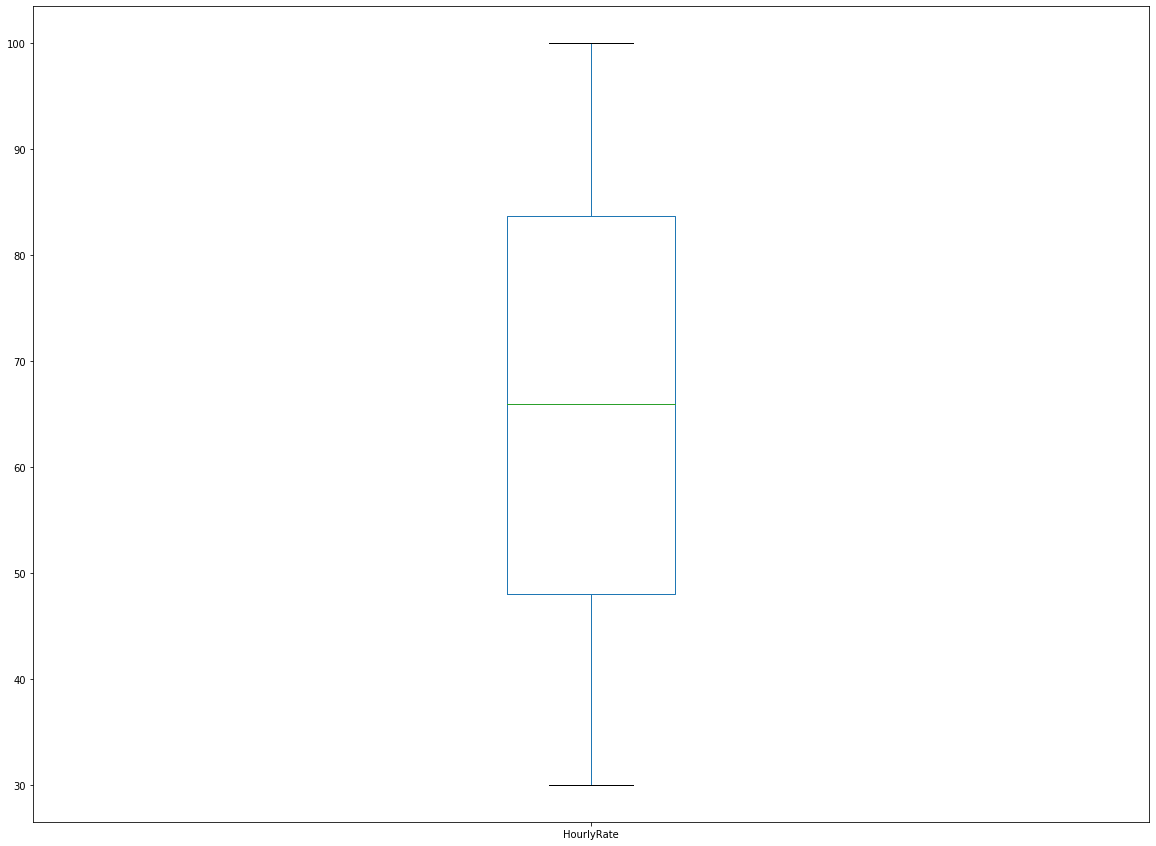

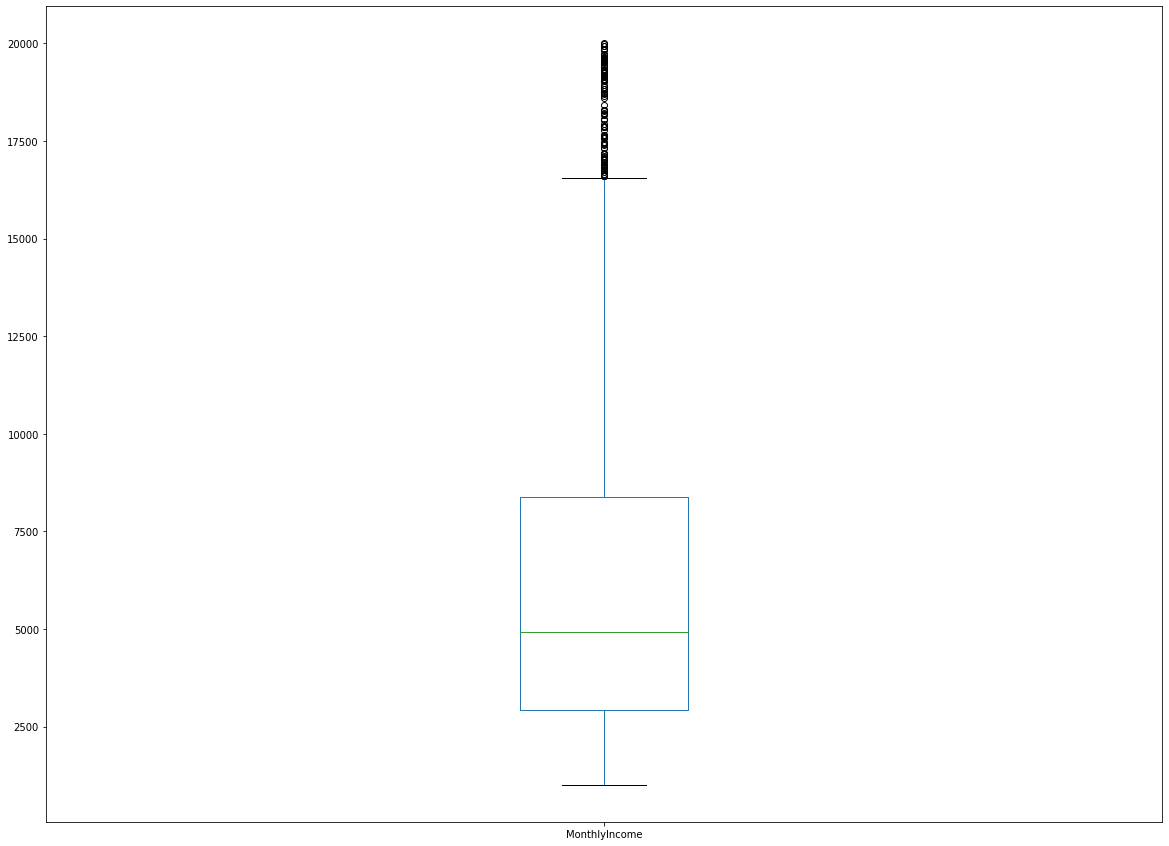

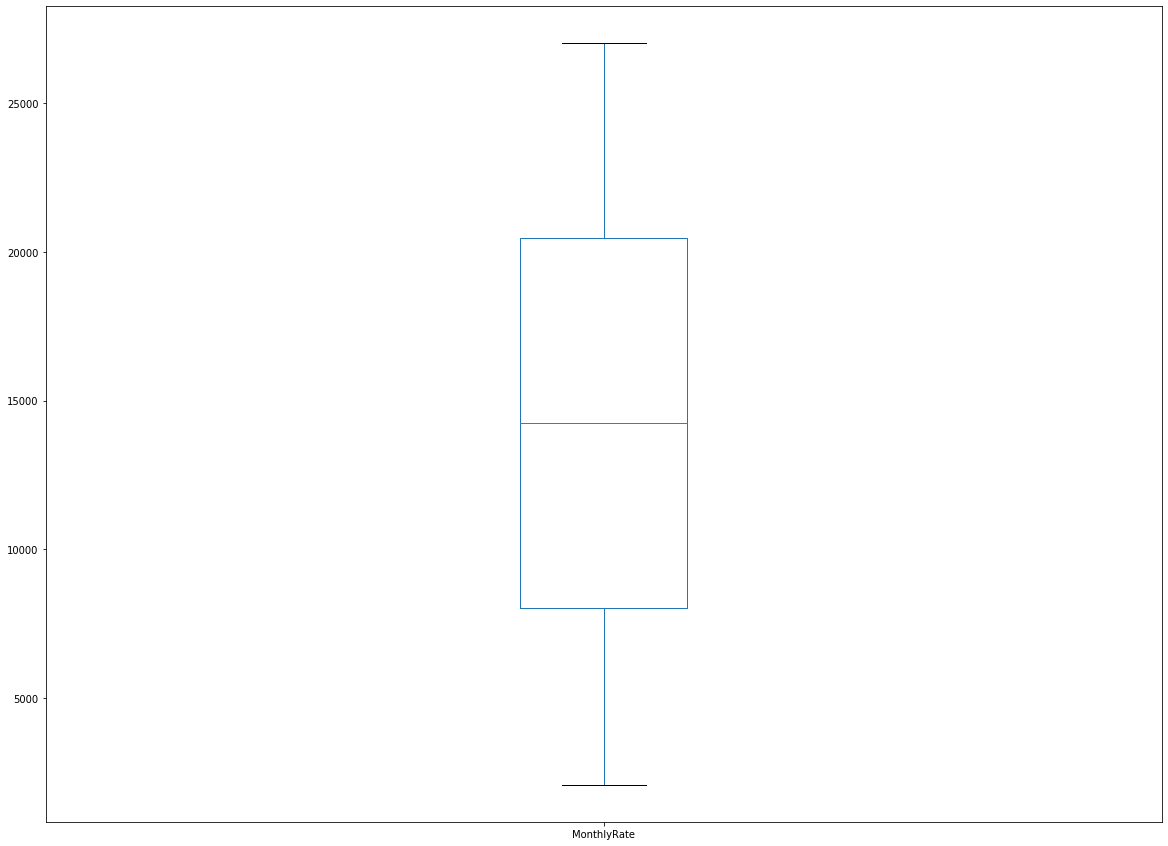

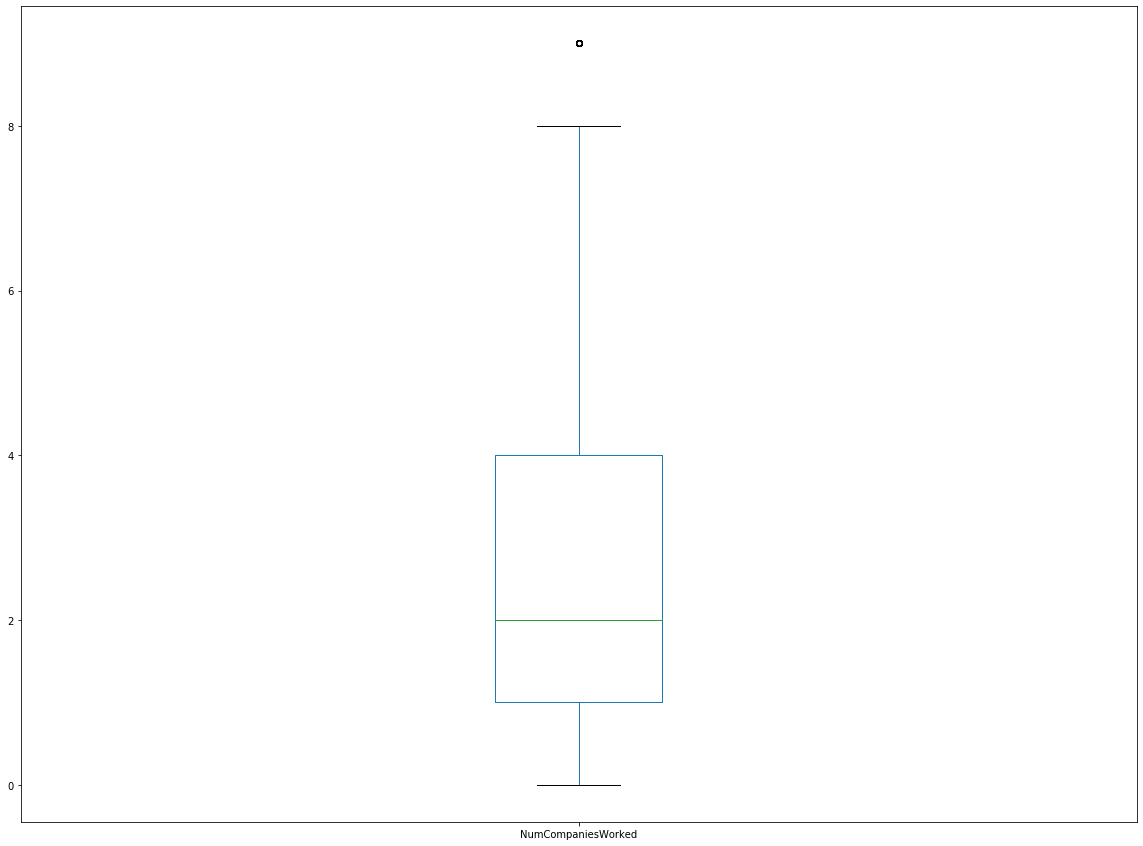

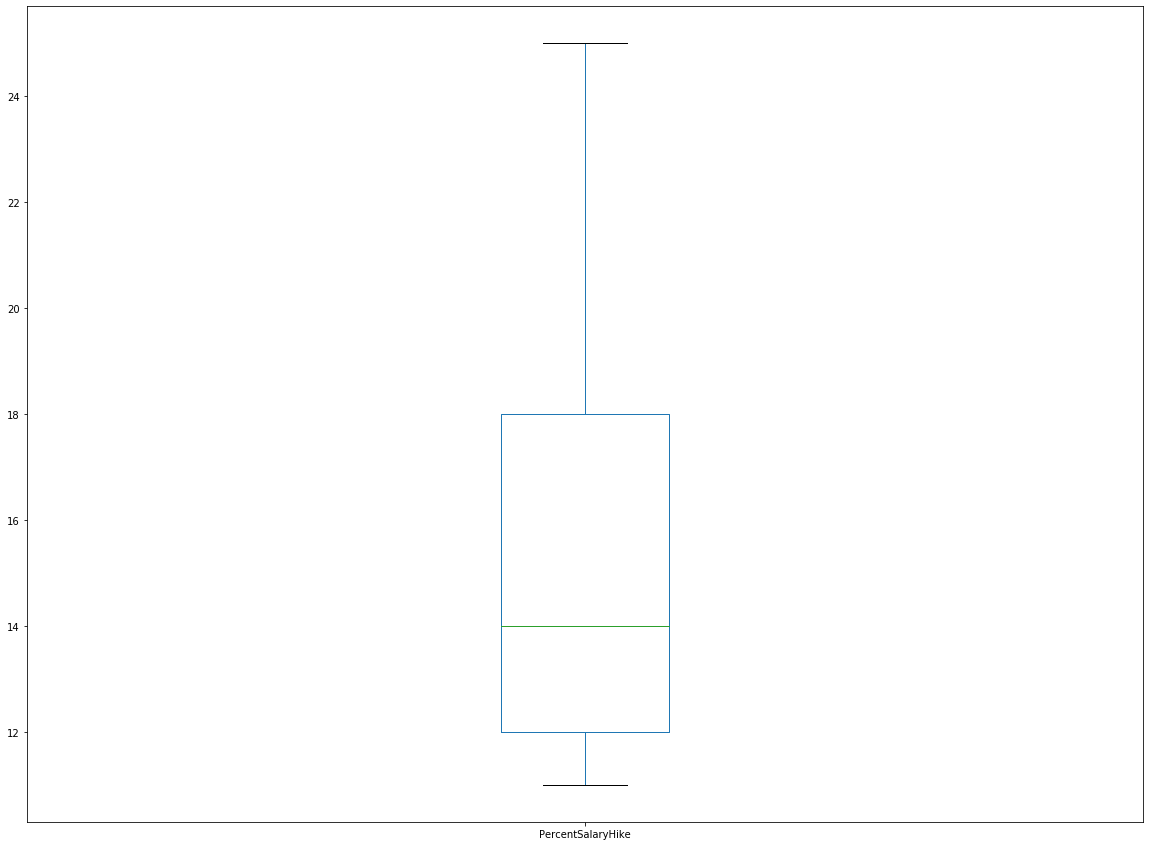

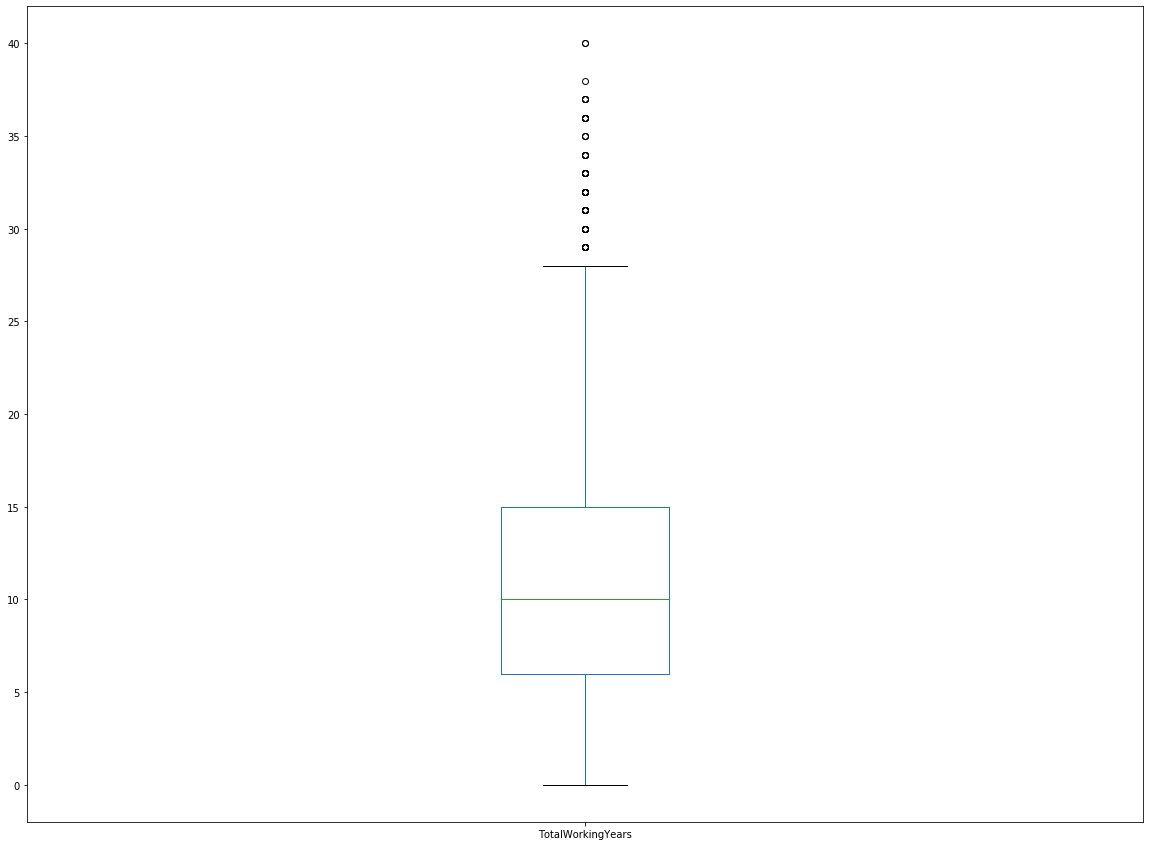

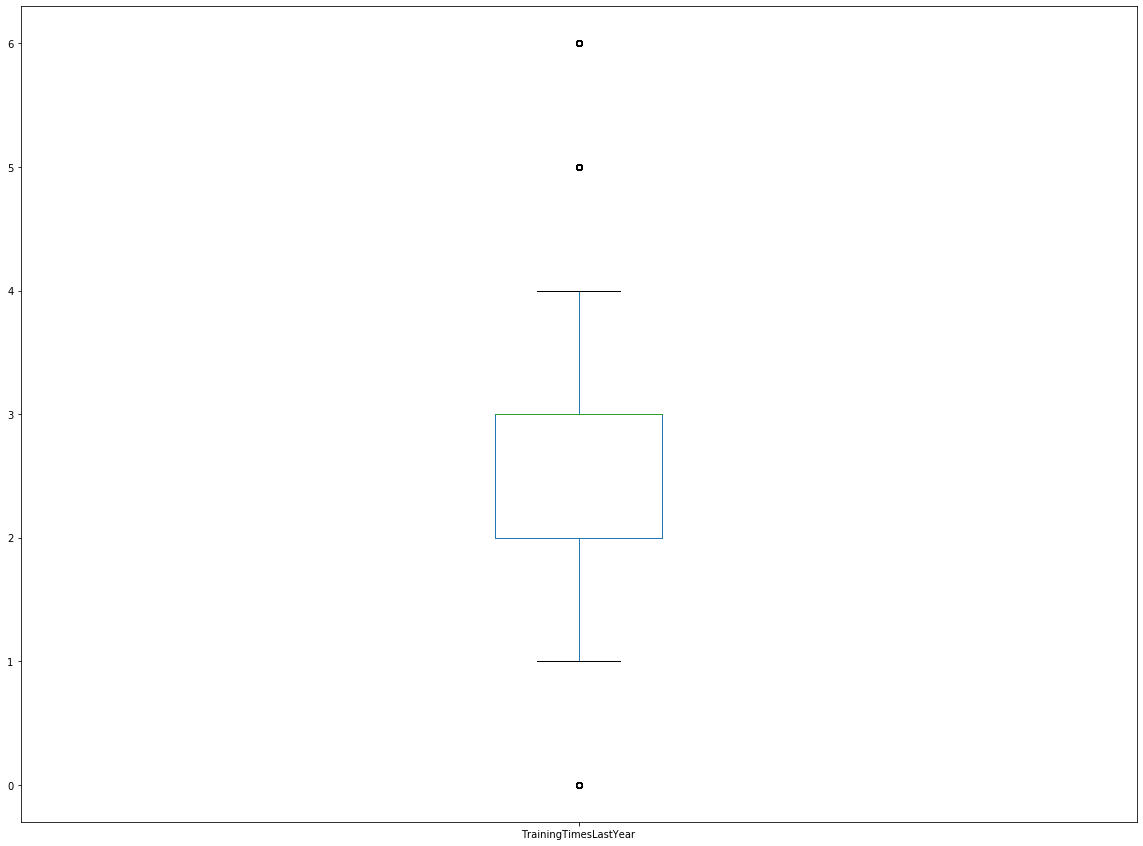

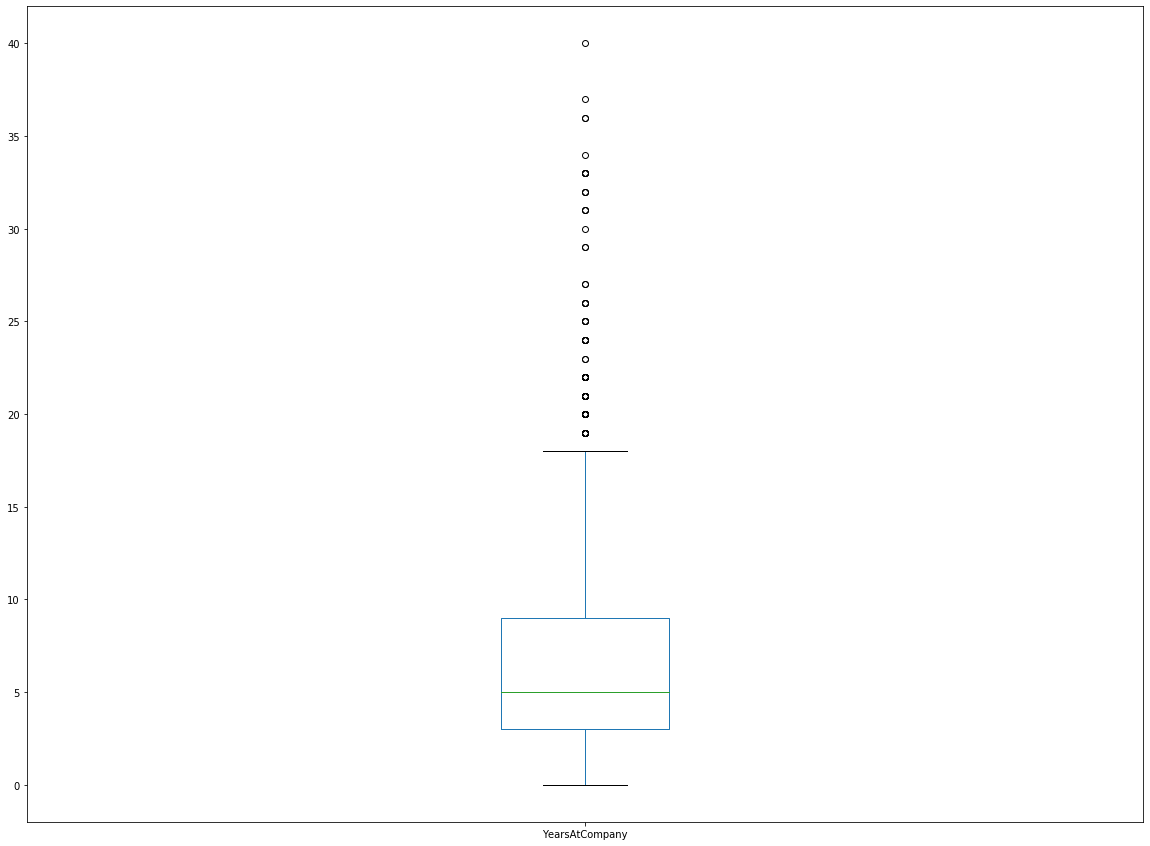

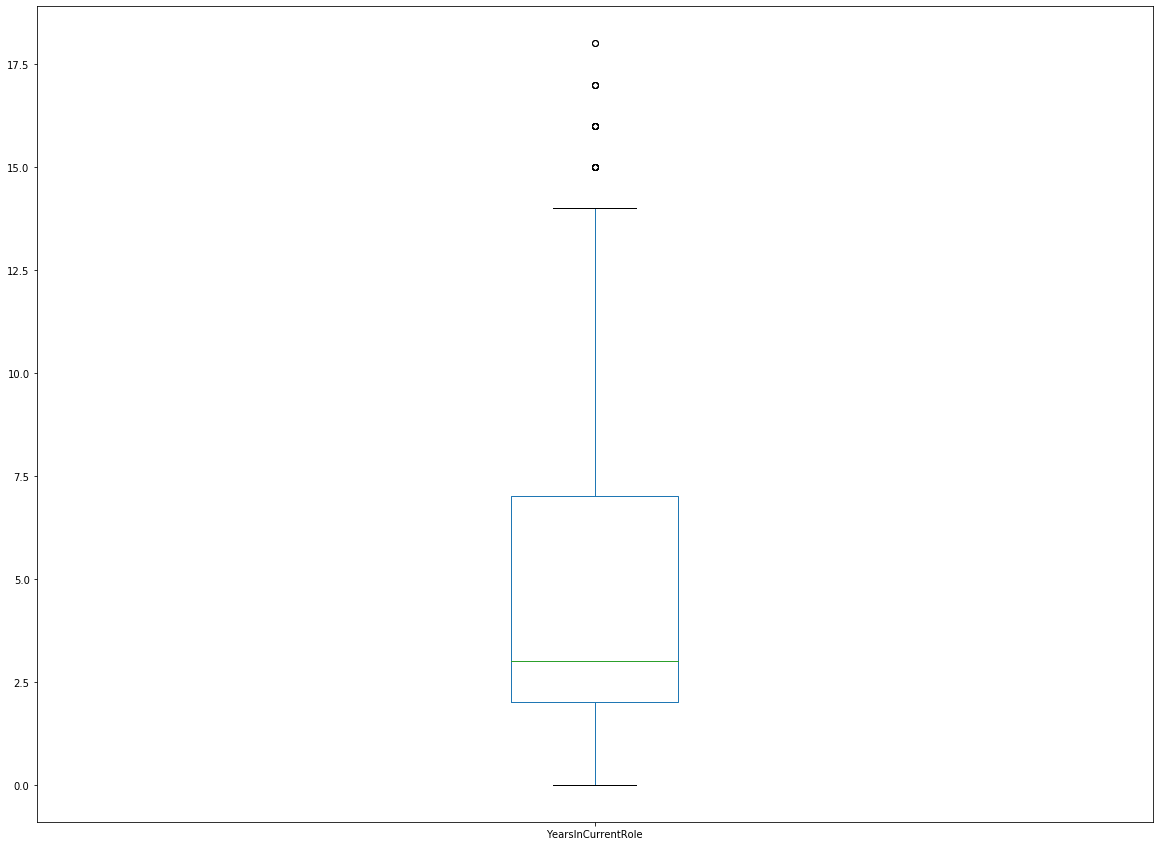

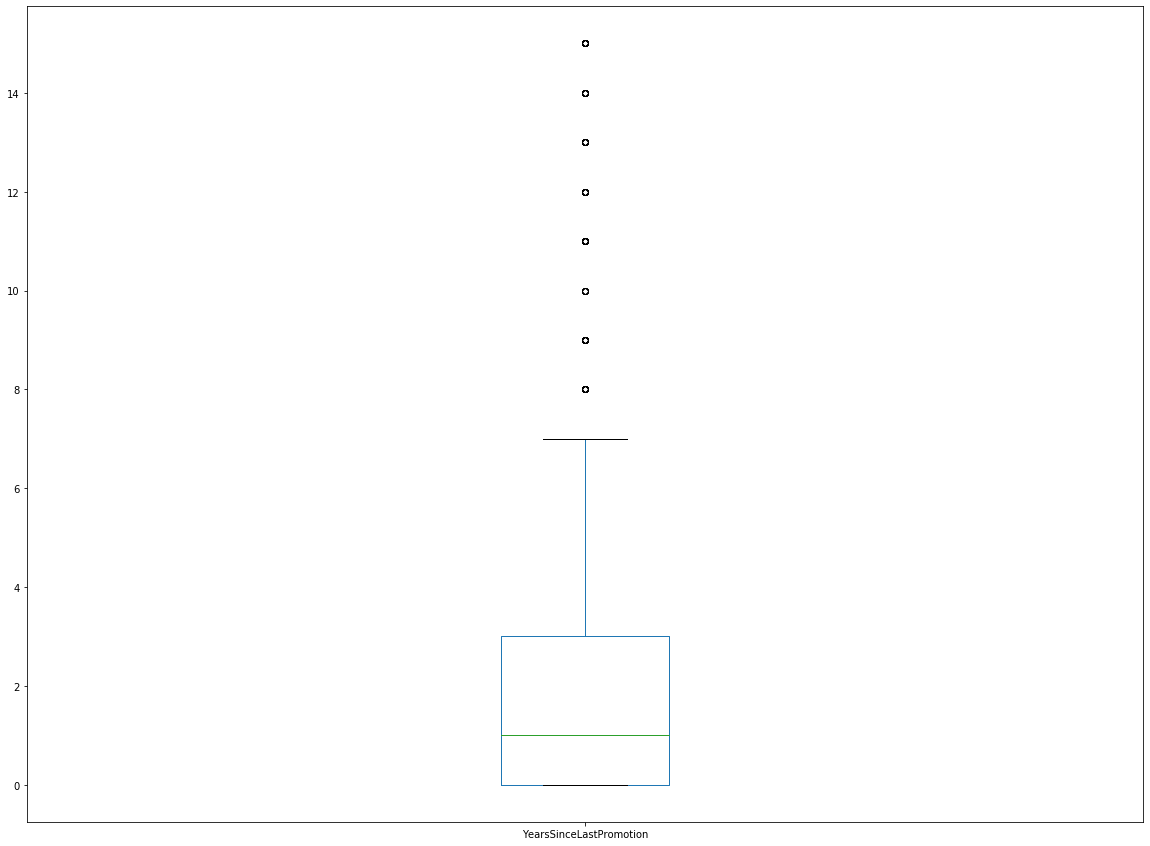

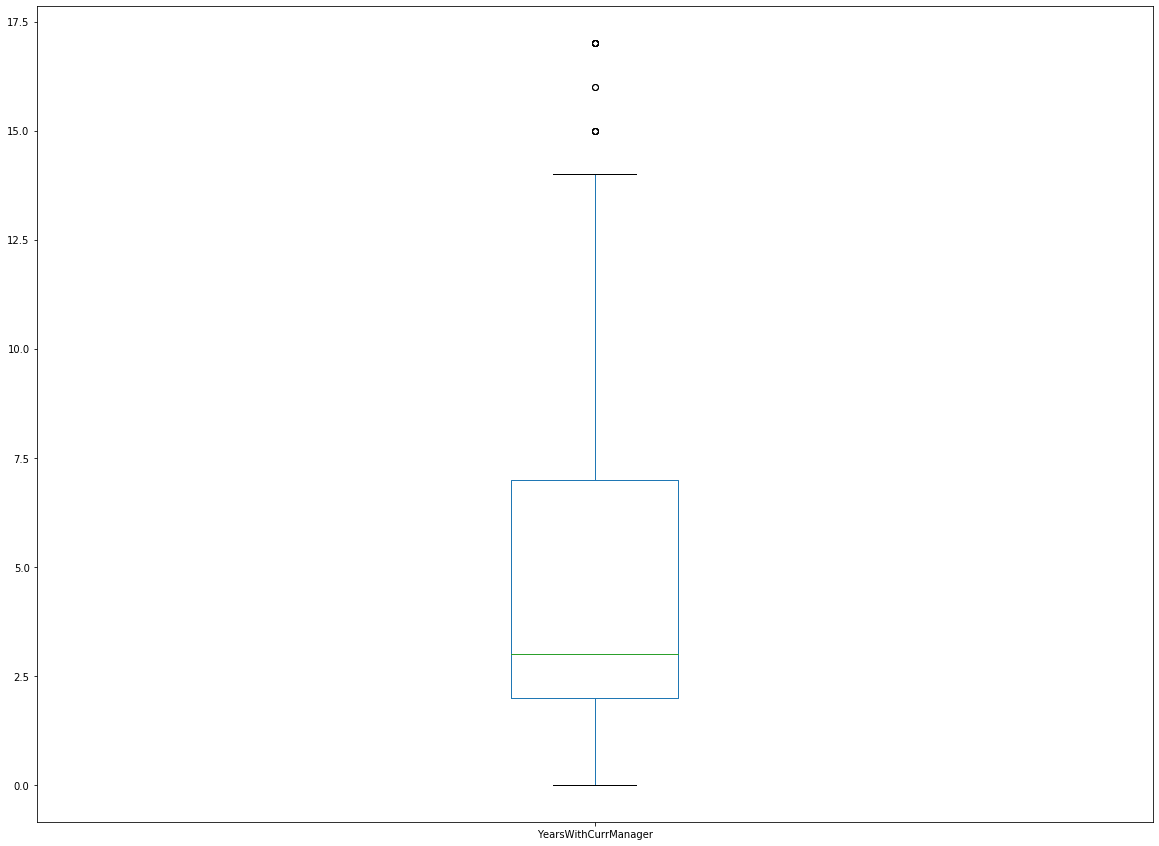

In [27]:
for i in cont_cols:
    plt.figure(figsize = (20, 15))
    df[i].plot.box()

There are some outliers in the dataset but nothing too fishy, all these are acceptable. So there is no need for outliers treatment.

In [28]:
df[cont_cols].skew()

Age                        0.413286
DailyRate                 -0.003519
DistanceFromHome           0.958118
HourlyRate                -0.032311
MonthlyIncome              1.369817
MonthlyRate                0.018578
NumCompaniesWorked         1.026471
PercentSalaryHike          0.821128
TotalWorkingYears          1.117172
TrainingTimesLastYear      0.553124
YearsAtCompany             1.764529
YearsInCurrentRole         0.917363
YearsSinceLastPromotion    1.984290
YearsWithCurrManager       0.833451
dtype: float64

DistanceFromHome, MonthlyIncome, NumCompaniesWorked, PercentSalaryHike, TotalWorkingYears, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager all have skewness higher than the accepted threshold value of +-0.5. Hence we need to treat these skewness.

In [29]:
df_new = df

In [30]:
from sklearn.preprocessing import power_transform        #removing skewness
df_new[cont_cols] = power_transform(df[cont_cols], method='yeo-johnson')        #using yeo-johnson method due to presence of negative skewness
df_new = pd.DataFrame(df_new, columns = df.columns)

In [31]:
df_new[cont_cols].skew()

Age                       -0.007603
DailyRate                 -0.196160
DistanceFromHome          -0.007468
HourlyRate                -0.106461
MonthlyIncome              0.000000
MonthlyRate               -0.184087
NumCompaniesWorked         0.014814
PercentSalaryHike          0.116250
TotalWorkingYears         -0.010653
TrainingTimesLastYear      0.058058
YearsAtCompany            -0.008683
YearsInCurrentRole        -0.060849
YearsSinceLastPromotion    0.212129
YearsWithCurrManager      -0.067565
dtype: float64

Skewness of continuous data is now reduced to below threshold value of +-0.5.

In [33]:
s = (df.dtypes == 'object')
obj_cols = list(s[s].index)

print("Categorical variables:")
print(obj_cols)

Categorical variables:
['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']


In [34]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for col in obj_cols:
    df_new[col] = label_encoder.fit_transform(df_new[col])

Using LabelEncoder to convert object data types into float or int, so we can use these values in models.

In [37]:
x = df_new.drop('Attrition', axis = 1)
y = df_new['Attrition']

# Best Random State

In [39]:
maxAccu = 0
maxRS = 0

for i in range (1, 500):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = i)
    LR = LogisticRegression()
    LR.fit(x_train, y_train)
    pred = LR.predict(x_test)
    acc = accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print ('Max Accuracy obtained is', maxAccu, 'on Random State', maxRS)

Max Accuracy obtained is 0.9183673469387755 on Random State 123


# Creating Train Test Split

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 123)

In [45]:
LR = LogisticRegression()
nb = GaussianNB()
DTC = DecisionTreeClassifier()
svc = SVC()
rf = RandomForestClassifier()
models = [LR, nb, DTC, svc, rf]
for i in models:
    print (i)
    i.fit(x_train, y_train)
    pred = i.predict(x_test)
    print (accuracy_score(y_test, pred))
    print (confusion_matrix(y_test, pred))
    print (classification_report(y_test, pred))


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
0.9183673469387755
[[376   8]
 [ 28  29]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       384
           1       0.78      0.51      0.62        57

    accuracy                           0.92       441
   macro avg       0.86      0.74      0.79       441
weighted avg       0.91      0.92      0.91       441

GaussianNB(priors=None, var_smoothing=1e-09)
0.8367346938775511
[[336  48]
 [ 24  33]]
              precision    recall  f1-score   support

           0       0.93      0.88      0.90       384
           1       0.41      0.58      0.48        57

    accuracy                           0.84       441


In [46]:
for i in models:
    cvs = cross_val_score(i, x, y, cv = 5)
    print ('Cross Validation Score for ',i, ' model is :', cvs.mean())
    print (' ')

Cross Validation Score for  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)  model is : 0.8693877551020407
 
Cross Validation Score for  GaussianNB(priors=None, var_smoothing=1e-09)  model is : 0.8258503401360544
 
Cross Validation Score for  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')  model is : 0.7857142857142858
 
Cross Validation Sc

Random Forest model has the accuracy score of 0.90 and cross validation mean of 0.85, hence it is the best model.

# Hypertuning

In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [49]:
rfc = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 3)
rfc.fit(x_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [50]:
rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 200}

In [52]:
rfc1=RandomForestClassifier(random_state=123, max_features='auto', n_estimators= 200, max_depth=8, criterion='entropy')
rfc1.fit(x_train, y_train)
predrfc1 = rfc1.predict(x_test)
print (accuracy_score(y_test, predrfc1))
print (confusion_matrix(y_test, predrfc1))
print (classification_report(y_test, predrfc1))

0.8956916099773242
[[382   2]
 [ 44  13]]
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       384
           1       0.87      0.23      0.36        57

    accuracy                           0.90       441
   macro avg       0.88      0.61      0.65       441
weighted avg       0.89      0.90      0.87       441



In [55]:
cvs = cross_val_score(rfc1, x, y, cv = 5)
print ('Cross Validation Score for ',rfc1, ' model is :', cvs.mean())

Cross Validation Score for  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)  model is : 0.8544217687074831


There wasn't much improve in accuracy and cross validation score after gridsearchcv.

In [56]:
import pickle

filename = 'HRattritionRfc.pkl'
pickle.dump(rfc1, open(filename, 'wb'))

# Conclusion

In [57]:
loaded_model = pickle.load(open('HRattritionRfc.pkl', 'rb'))
result = loaded_model.score(x_test, y_test)
print (result)

0.8956916099773242


In [59]:
conclusion = pd.DataFrame([loaded_model.predict(x_test)[:], predrfc1[:]], index = ['Predicted', 'Original'])

In [60]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,431,432,433,434,435,436,437,438,439,440
Predicted,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Original,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
